The overall aim of this project is to develop a fraud detection system for e-commerce transactions that leverages both machine learning and association rule learning techniques.

The dataset used in this project is the Credit Card Fraud Detection Dataset from the UCI Machine Learning Reopsitory available on Kaggle. Link to the dataset can be found here : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

Regarding the dataset - This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan.

The dataset consists of 25 variables:<br/>
- ID: ID of each client
-LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
-SEX: Gender (1=male, 2=female)
-EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
-MARRIAGE: Marital status (1=married, 2=single, 3=others)
-AGE: Age in years
-PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
-PAY_2: Repayment status in August, 2005 (scale same as above)
-PAY_3: Repayment status in July, 2005 (scale same as above)
-PAY_4: Repayment status in June, 2005 (scale same as above)
-PAY_5: Repayment status in May, 2005 (scale same as above)
-PAY_6: Repayment status in April, 2005 (scale same as above)
-BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
-BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
-BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
-BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
-BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
-BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
-PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
-PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
-PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
-PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
-PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
-PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
-default.payment.next.month: Default payment (1=yes, 0=no)

Done by : Govindram Neware (IMS20124) <br/>
Supervisor : Prof. Mainak Adhikari (SoDS, IISER TVM)
Course : DSC4

#Importing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

!pip install efficient_apriori
from efficient_apriori import apriori
import warnings

In [2]:
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
data = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
data.head(100)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,90000.0,1,2,2,35,0,0,0,0,...,35565.0,30942.0,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0
96,97,360000.0,1,1,1,43,-1,-1,-1,-1,...,6451.0,26370.0,9956.0,8339.0,3394.0,12902.0,27000.0,0.0,68978.0,0
97,98,150000.0,1,1,2,27,0,0,0,0,...,89775.0,87725.0,40788.0,4031.0,10006.0,3266.0,4040.0,1698.0,800.0,0
98,99,50000.0,2,3,1,22,0,0,0,0,...,13150.0,8866.0,7899.0,1411.0,1194.0,379.0,281.0,321.0,197.0,0


In [6]:
data.shape

(30000, 25)

#Data Preprocessing

###Checking for missing values

In [7]:
a = data.isnull()
a.value_counts()

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
Name: count, dtype: int64

In [8]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no signs of missing data.

### Principal Component Analysis

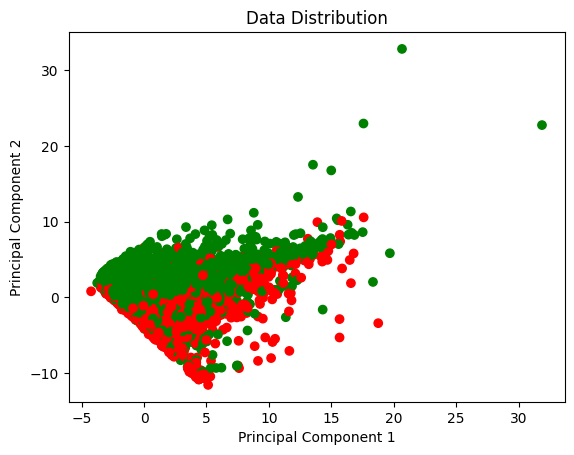

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

colors = data['default.payment.next.month'].map({0: 'green', 1: 'red'})

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Distribution')
plt.show()

Here is the visual representation of all the data samples 'default' and 'not_default'. We are supposed to find the fraudulent ones from this data.

###Checking for class imbalance

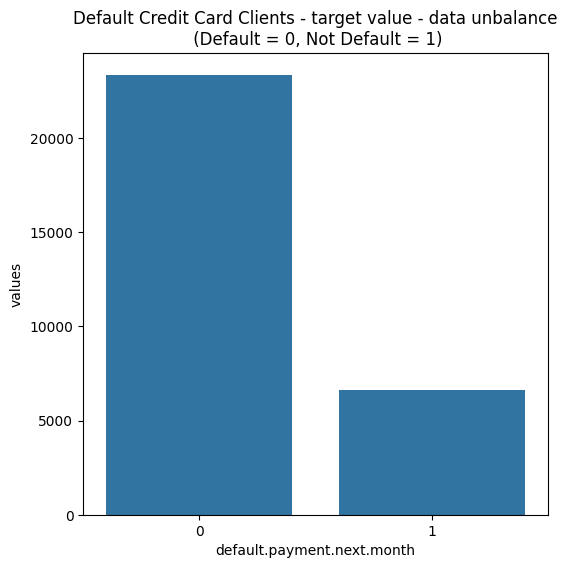

In [13]:
import seaborn as sns

temp = data["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

The data is imbalanced. This will cause problems when applying the machine learning algorithm. So we can use undersampling or oversampling in order to balance out the dataset for fair and better interpretation of prediction results.

###Defining Features and Target Variable

In [4]:
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

In [15]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [16]:
y.value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

###Handling Categorical Variables

In [5]:
#Label encoding for categorical features

le = LabelEncoder()
for col in ["SEX", "EDUCATION", "MARRIAGE"]:
    X[col] = le.fit_transform(X[col])

###Handling Numerical Variables

In [6]:
#MinMax scaling for numerical features (except PAY_0 to PAY_6)

scaler = MinMaxScaler()
numerical_features = [
    col for col in X.columns if col not in ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
]
X[numerical_features] = scaler.fit_transform(X[numerical_features])

###Handling Repayment Status Features

In [7]:
# Thresholding for repayment status

thresholds = {"PAY_0": 2, "PAY_2": 2, "PAY_3": 2, "PAY_4": 2, "PAY_5": 2, "PAY_6": 2}
def transform_repayment(data, thresholds):
  for col, threshold in thresholds.items():
    data[col] = (data[col] > threshold).astype(int)
  return data

X = transform_repayment(X.copy(), thresholds)

###Discretizing Numerical Features into bins

In [8]:
#Discretizing numerical features using KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='onehot-dense')
numerical_features_to_discretize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X_discretized = discretizer.fit_transform(X[numerical_features_to_discretize])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [9]:
# Converting discretized features to a DataFrame

X_discretized = pd.DataFrame(X_discretized, columns=discretizer.get_feature_names_out(numerical_features_to_discretize))

In [10]:
#Concatenating discretized features with other features

association_features = pd.concat([X.drop(numerical_features_to_discretize + ["ID", "AGE"], axis=1), X_discretized], axis=1)

###Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Learning representations from past data (Using Support Vector Machine)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = SVC()
model.fit(X_train, y_train)

#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Evaluation:
Accuracy: 0.7891666666666667
Precision: 0.6237113402061856
Recall: 0.09215536938309216
F1-score: 0.16058394160583944


I did an ablation study by trying normal sampling, undersampling and over-sampling the training data. Here are the results of the model evaluation:

| Sampling | Accuracy | Precision | Recall | F1 Score |
|---|---|---|---|---|
| Normal Sampling | 78.92% | 62.37% | 9.22% | 16.06% |
| Oversampling | 21.88% | 21.88% | 100% | 35.91% |
| Undersampling | 21.88% | 21.88% | 100% | 35.91% |

Based on these results, moving ahead with normal sampling seemed like the right choice in this scenario.
Also, while making the final predictions (when oversampling and under-sampling were used), the algorithm was flagging every transaction as a high risk transaction. This was another reason why I chose normal sampling over overasmpling and under-sampling


#Generating Association Rules

In [13]:
#Defining munimum support and confidence
min_support = 0.1
min_confidence = 0.8

# Generate frequent itemsets and association rules
frequent_itemsets, rules = apriori(association_features, min_support=min_support, min_confidence=min_confidence)

print(frequent_itemsets)
print(rules)

{1: {('A',): 70, ('T',): 63, ('I',): 37, ('M',): 63, ('P',): 33, ('Y',): 33, ('_',): 68, ('0',): 63, ('2',): 22, ('3',): 22, ('4',): 19, ('5',): 10, ('6',): 10, ('L',): 35, ('B',): 35, ('.',): 62, ('1',): 21}, 2: {('.', '0'): 62, ('.', '1'): 21, ('.', '2'): 21, ('.', '3'): 21, ('.', '4'): 18, ('.', '5'): 9, ('.', '6'): 9, ('.', 'A'): 62, ('.', 'B'): 35, ('.', 'I'): 35, ('.', 'L'): 35, ('.', 'M'): 62, ('.', 'P'): 27, ('.', 'T'): 62, ('.', 'Y'): 27, ('.', '_'): 62, ('0', '1'): 21, ('0', '2'): 21, ('0', '3'): 21, ('0', '4'): 18, ('0', '5'): 9, ('0', '6'): 9, ('0', 'A'): 63, ('0', 'B'): 35, ('0', 'I'): 35, ('0', 'L'): 35, ('0', 'M'): 62, ('0', 'P'): 28, ('0', 'T'): 62, ('0', 'Y'): 28, ('0', '_'): 63, ('1', 'A'): 21, ('1', 'B'): 11, ('1', 'I'): 11, ('1', 'L'): 11, ('1', 'M'): 21, ('1', 'P'): 10, ('1', 'T'): 21, ('1', 'Y'): 10, ('1', '_'): 21, ('2', 'A'): 22, ('2', 'B'): 11, ('2', 'I'): 11, ('2', 'L'): 11, ('2', 'M'): 21, ('2', 'P'): 11, ('2', 'T'): 21, ('2', 'Y'): 11, ('2', '_'): 22, ('3', 

#Final Predictions

In [15]:
# Checking for suspicious patterns
def suspicious_pattern_found(transaction, rules):
    transaction_items = set(transaction.index[transaction == 1].tolist())
    for rule in rules:
        antecedent_items = set(rule.lhs)
        if antecedent_items.issubset(transaction_items):
            return True
    return False

normal_count = 0 #Used for sinal summary
fraud_count = 0
flagged_count = 0

for i in range(len(X_test)):

    # Making prediction using the model
    prediction = model.predict([X_test.iloc[i]])
    if prediction == 1 and suspicious_pattern_found(X_test.iloc[i], rules):
        fraud_count += 1
        flagged_count += 1  # Increment flagged count
        print(f"Transaction {i+1} flagged (high risk and suspicious pattern)")
    elif prediction == 1:
        fraud_count += 1
        flagged_count += 1  # Increment flagged count
        print(f"Transaction {i+1} flagged (high risk)")
    else:
        normal_count += 1
        print(f"Transaction {i+1} - normal")

    # Checking if the prediction is high-risk
    if prediction == 1:
        # Checking if the transaction matches any suspicious pattern from association rules
        if suspicious_pattern_found(X_test.iloc[i], rules):
            # Flagging the transaction for further investigation (high priority)
            print(f"Transaction {i+1} flagged (high risk and suspicious pattern)")
        else:
            # Flagging the transaction for investigation (medium priority)
            print(f"Transaction {i+1} flagged (high risk)")
    else:
        print(f"Transaction {i+1} - normal")

# Print summary
print("\n--- Summary ---")
print(f"Normal Transactions: {normal_count}")
print(f"Flagged Transactions (Medium & High Risk): {flagged_count}")
print(f"Fraudulent Transactions: {fraud_count}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1 - normal
Transaction 1 - normal
Transaction 2 - normal
Transaction 2 - normal
Transaction 3 - normal
Transaction 3 - normal
Transaction 4 - normal
Transaction 4 - normal
Transaction 5 - normal
Transaction 5 - normal
Transaction 6 - normal
Transaction 6 - normal
Transaction 7 - normal
Transaction 7 - normal
Transaction 8 - normal
Transaction 8 - normal
Transaction 9 - normal
Transaction 9 - normal
Transaction 10 - normal
Transaction 10 - normal
Transaction 11 - normal
Transaction 11 - normal
Transaction 12 - normal
Transaction 12 - normal
Transaction 13 - normal
Transaction 13 - normal
Transaction 14 flagged (high risk)
Transaction 14 flagged (high risk)
Transaction 15 - normal
Transaction 15 - normal
Transaction 16 - normal
Transaction 16 - normal
Transaction 17 - normal
Transaction 17 - normal
Transaction 18 - normal
Transaction 18 - normal
Transaction 19 - normal
Transaction 19 - normal
Transaction 20 - normal
Transaction 20 - normal
Transaction 21 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 138 - normal
Transaction 138 - normal
Transaction 139 - normal
Transaction 139 - normal
Transaction 140 - normal
Transaction 140 - normal
Transaction 141 - normal
Transaction 141 - normal
Transaction 142 - normal
Transaction 142 - normal
Transaction 143 - normal
Transaction 143 - normal
Transaction 144 - normal
Transaction 144 - normal
Transaction 145 - normal
Transaction 145 - normal
Transaction 146 - normal
Transaction 146 - normal
Transaction 147 - normal
Transaction 147 - normal
Transaction 148 - normal
Transaction 148 - normal
Transaction 149 - normal
Transaction 149 - normal
Transaction 150 - normal
Transaction 150 - normal
Transaction 151 - normal
Transaction 151 - normal
Transaction 152 - normal
Transaction 152 - normal
Transaction 153 - normal
Transaction 153 - normal
Transaction 154 - normal
Transaction 154 - normal
Transaction 155 - normal
Transaction 155 - normal
Transaction 156 flagged (high risk)
Transaction 156 flagged (high risk)
Transaction 157 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 190 - normal
Transaction 190 - normal
Transaction 191 - normal
Transaction 191 - normal
Transaction 192 - normal
Transaction 192 - normal
Transaction 193 - normal
Transaction 193 - normal
Transaction 194 - normal
Transaction 194 - normal
Transaction 195 - normal
Transaction 195 - normal
Transaction 196 - normal
Transaction 196 - normal
Transaction 197 - normal
Transaction 197 - normal
Transaction 198 - normal
Transaction 198 - normal
Transaction 199 - normal
Transaction 199 - normal
Transaction 200 - normal
Transaction 200 - normal
Transaction 201 - normal
Transaction 201 - normal
Transaction 202 - normal
Transaction 202 - normal
Transaction 203 - normal
Transaction 203 - normal
Transaction 204 - normal
Transaction 204 - normal
Transaction 205 - normal
Transaction 205 - normal
Transaction 206 - normal
Transaction 206 - normal
Transaction 207 - normal
Transaction 207 - normal
Transaction 208 - normal
Transaction 208 - normal
Transaction 209 - normal
Transaction 209 - normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 240 flagged (high risk)
Transaction 241 - normal
Transaction 241 - normal
Transaction 242 - normal
Transaction 242 - normal
Transaction 243 - normal
Transaction 243 - normal
Transaction 244 - normal
Transaction 244 - normal
Transaction 245 - normal
Transaction 245 - normal
Transaction 246 - normal
Transaction 246 - normal
Transaction 247 - normal
Transaction 247 - normal
Transaction 248 - normal
Transaction 248 - normal
Transaction 249 - normal
Transaction 249 - normal
Transaction 250 - normal
Transaction 250 - normal
Transaction 251 - normal
Transaction 251 - normal
Transaction 252 - normal
Transaction 252 - normal
Transaction 253 - normal
Transaction 253 - normal
Transaction 254 - normal
Transaction 254 - normal
Transaction 255 - normal
Transaction 255 - normal
Transaction 256 - normal
Transaction 256 - normal
Transaction 257 - normal
Transaction 257 - normal
Transaction 258 - normal
Transaction 258 - normal
Transaction 259 - normal
Transaction 259 - normal
Transaction 26

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 288 flagged (high risk)
Transaction 289 - normal
Transaction 289 - normal
Transaction 290 - normal
Transaction 290 - normal
Transaction 291 flagged (high risk)
Transaction 291 flagged (high risk)
Transaction 292 - normal
Transaction 292 - normal
Transaction 293 - normal
Transaction 293 - normal
Transaction 294 - normal
Transaction 294 - normal
Transaction 295 - normal
Transaction 295 - normal
Transaction 296 - normal
Transaction 296 - normal
Transaction 297 - normal
Transaction 297 - normal
Transaction 298 - normal
Transaction 298 - normal
Transaction 299 - normal
Transaction 299 - normal
Transaction 300 - normal
Transaction 300 - normal
Transaction 301 - normal
Transaction 301 - normal
Transaction 302 - normal
Transaction 302 - normal
Transaction 303 - normal
Transaction 303 - normal
Transaction 304 flagged (high risk)
Transaction 304 flagged (high risk)
Transaction 305 - normal
Transaction 305 - normal
Transaction 306 - normal
Transaction 306 - normal
Transaction 307 - no

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 329 - normal
Transaction 329 - normal
Transaction 330 - normal
Transaction 330 - normal
Transaction 331 - normal
Transaction 331 - normal
Transaction 332 - normal
Transaction 332 - normal
Transaction 333 - normal
Transaction 333 - normal
Transaction 334 - normal
Transaction 334 - normal
Transaction 335 - normal
Transaction 335 - normal
Transaction 336 - normal
Transaction 336 - normal
Transaction 337 - normal
Transaction 337 - normal
Transaction 338 - normal
Transaction 338 - normal
Transaction 339 - normal
Transaction 339 - normal
Transaction 340 - normal
Transaction 340 - normal
Transaction 341 - normal
Transaction 341 - normal
Transaction 342 - normal
Transaction 342 - normal
Transaction 343 - normal
Transaction 343 - normal
Transaction 344 - normal
Transaction 344 - normal
Transaction 345 - normal
Transaction 345 - normal
Transaction 346 - normal
Transaction 346 - normal
Transaction 347 flagged (high risk)
Transaction 347 flagged (high risk)
Transaction 348 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 373 flagged (high risk)
Transaction 373 flagged (high risk)
Transaction 374 - normal
Transaction 374 - normal
Transaction 375 - normal
Transaction 375 - normal
Transaction 376 - normal
Transaction 376 - normal
Transaction 377 - normal
Transaction 377 - normal
Transaction 378 - normal
Transaction 378 - normal
Transaction 379 - normal
Transaction 379 - normal
Transaction 380 - normal
Transaction 380 - normal
Transaction 381 - normal
Transaction 381 - normal
Transaction 382 - normal
Transaction 382 - normal
Transaction 383 - normal
Transaction 383 - normal
Transaction 384 - normal
Transaction 384 - normal
Transaction 385 - normal
Transaction 385 - normal
Transaction 386 - normal
Transaction 386 - normal
Transaction 387 - normal
Transaction 387 - normal
Transaction 388 - normal
Transaction 388 - normal
Transaction 389 - normal
Transaction 389 - normal
Transaction 390 - normal
Transaction 390 - normal
Transaction 391 - normal
Transaction 391 - normal
Transaction 392 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr


Transaction 414 - normal
Transaction 414 - normal
Transaction 415 - normal
Transaction 415 - normal
Transaction 416 - normal
Transaction 416 - normal
Transaction 417 - normal
Transaction 417 - normal
Transaction 418 - normal
Transaction 418 - normal
Transaction 419 - normal
Transaction 419 - normal
Transaction 420 - normal
Transaction 420 - normal
Transaction 421 - normal
Transaction 421 - normal
Transaction 422 - normal
Transaction 422 - normal
Transaction 423 - normal
Transaction 423 - normal
Transaction 424 - normal
Transaction 424 - normal
Transaction 425 - normal
Transaction 425 - normal
Transaction 426 - normal
Transaction 426 - normal
Transaction 427 - normal
Transaction 427 - normal
Transaction 428 - normal
Transaction 428 - normal
Transaction 429 - normal
Transaction 429 - normal
Transaction 430 - normal
Transaction 430 - normal
Transaction 431 - normal
Transaction 431 - normal
Transaction 432 - normal
Transaction 432 - normal
Transaction 433 flagged (high risk)
Transaction 4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 490 - normal
Transaction 491 - normal
Transaction 491 - normal
Transaction 492 - normal
Transaction 492 - normal
Transaction 493 - normal
Transaction 493 - normal
Transaction 494 - normal
Transaction 494 - normal
Transaction 495 - normal
Transaction 495 - normal
Transaction 496 - normal
Transaction 496 - normal
Transaction 497 - normal
Transaction 497 - normal
Transaction 498 - normal
Transaction 498 - normal
Transaction 499 - normal
Transaction 499 - normal
Transaction 500 - normal
Transaction 500 - normal
Transaction 501 - normal
Transaction 501 - normal
Transaction 502 - normal
Transaction 502 - normal
Transaction 503 - normal
Transaction 503 - normal
Transaction 504 - normal
Transaction 504 - normal
Transaction 505 - normal
Transaction 505 - normal
Transaction 506 - normal
Transaction 506 - normal
Transaction 507 - normal
Transaction 507 - normal
Transaction 508 - normal
Transaction 508 - normal
Transaction 509 - normal
Transaction 509 - normal
Transaction 510 - normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 551 - normal
Transaction 551 - normal
Transaction 552 - normal
Transaction 552 - normal
Transaction 553 - normal
Transaction 553 - normal
Transaction 554 - normal
Transaction 554 - normal
Transaction 555 - normal
Transaction 555 - normal
Transaction 556 - normal
Transaction 556 - normal
Transaction 557 - normal
Transaction 557 - normal
Transaction 558 - normal
Transaction 558 - normal
Transaction 559 - normal
Transaction 559 - normal
Transaction 560 - normal
Transaction 560 - normal
Transaction 561 - normal
Transaction 561 - normal
Transaction 562 - normal
Transaction 562 - normal
Transaction 563 - normal
Transaction 563 - normal
Transaction 564 - normal
Transaction 564 - normal
Transaction 565 - normal
Transaction 565 - normal
Transaction 566 flagged (high risk)
Transaction 566 flagged (high risk)
Transaction 567 - normal
Transaction 567 - normal
Transaction 568 - normal
Transaction 568 - normal
Transaction 569 - normal
Transaction 569 - normal
Transaction 570 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 594 flagged (high risk)
Transaction 594 flagged (high risk)
Transaction 595 - normal
Transaction 595 - normal
Transaction 596 - normal
Transaction 596 - normal
Transaction 597 - normal
Transaction 597 - normal
Transaction 598 - normal
Transaction 598 - normal
Transaction 599 - normal
Transaction 599 - normal
Transaction 600 - normal
Transaction 600 - normal
Transaction 601 - normal
Transaction 601 - normal
Transaction 602 - normal
Transaction 602 - normal
Transaction 603 - normal
Transaction 603 - normal
Transaction 604 - normal
Transaction 604 - normal
Transaction 605 - normal
Transaction 605 - normal
Transaction 606 - normal
Transaction 606 - normal
Transaction 607 - normal
Transaction 607 - normal
Transaction 608 - normal
Transaction 608 - normal
Transaction 609 - normal
Transaction 609 - normal
Transaction 610 flagged (high risk)
Transaction 610 flagged (high risk)
Transaction 611 - normal
Transaction 611 - normal
Transaction 612 - normal
Transaction 612 - normal
Transa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 631 - normal
Transaction 631 - normal
Transaction 632 - normal
Transaction 632 - normal
Transaction 633 - normal
Transaction 633 - normal
Transaction 634 - normal
Transaction 634 - normal
Transaction 635 - normal
Transaction 635 - normal
Transaction 636 - normal
Transaction 636 - normal
Transaction 637 flagged (high risk)
Transaction 637 flagged (high risk)
Transaction 638 - normal
Transaction 638 - normal
Transaction 639 - normal
Transaction 639 - normal
Transaction 640 - normal
Transaction 640 - normal
Transaction 641 - normal
Transaction 641 - normal
Transaction 642 - normal
Transaction 642 - normal
Transaction 643 - normal
Transaction 643 - normal
Transaction 644 - normal
Transaction 644 - normal
Transaction 645 - normal
Transaction 645 - normal
Transaction 646 - normal
Transaction 646 - normal
Transaction 647 - normal
Transaction 647 - normal
Transaction 648 - normal
Transaction 648 - normal
Transaction 649 - normal
Transaction 649 - normal
Transaction 650 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 677 - normal
Transaction 677 - normal
Transaction 678 - normal
Transaction 678 - normal
Transaction 679 - normal
Transaction 679 - normal
Transaction 680 - normal
Transaction 680 - normal
Transaction 681 - normal
Transaction 681 - normal
Transaction 682 - normal
Transaction 682 - normal
Transaction 683 - normal
Transaction 683 - normal
Transaction 684 - normal
Transaction 684 - normal
Transaction 685 - normal
Transaction 685 - normal
Transaction 686 - normal
Transaction 686 - normal
Transaction 687 - normal
Transaction 687 - normal
Transaction 688 - normal
Transaction 688 - normal
Transaction 689 - normal
Transaction 689 - normal
Transaction 690 flagged (high risk)
Transaction 690 flagged (high risk)
Transaction 691 - normal
Transaction 691 - normal
Transaction 692 - normal
Transaction 692 - normal
Transaction 693 - normal
Transaction 693 - normal
Transaction 694 - normal
Transaction 694 - normal
Transaction 695 - normal
Transaction 695 - normal
Transaction 696 - normal
Tra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 736 flagged (high risk)
Transaction 737 - normal
Transaction 737 - normal
Transaction 738 - normal
Transaction 738 - normal
Transaction 739 - normal
Transaction 739 - normal
Transaction 740 - normal
Transaction 740 - normal
Transaction 741 - normal
Transaction 741 - normal
Transaction 742 - normal
Transaction 742 - normal
Transaction 743 - normal
Transaction 743 - normal
Transaction 744 flagged (high risk)
Transaction 744 flagged (high risk)
Transaction 745 - normal
Transaction 745 - normal
Transaction 746 - normal
Transaction 746 - normal
Transaction 747 - normal
Transaction 747 - normal
Transaction 748 - normal
Transaction 748 - normal
Transaction 749 - normal
Transaction 749 - normal
Transaction 750 - normal
Transaction 750 - normal
Transaction 751 - normal
Transaction 751 - normal
Transaction 752 - normal
Transaction 752 - normal
Transaction 753 - normal
Transaction 753 - normal
Transaction 754 - normal
Transaction 754 - normal
Transaction 755 - normal
Transaction 755 -

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 785 - normal
Transaction 785 - normal
Transaction 786 - normal
Transaction 786 - normal
Transaction 787 - normal
Transaction 787 - normal
Transaction 788 - normal
Transaction 788 - normal
Transaction 789 - normal
Transaction 789 - normal
Transaction 790 - normal
Transaction 790 - normal
Transaction 791 - normal
Transaction 791 - normal
Transaction 792 - normal
Transaction 792 - normal
Transaction 793 - normal
Transaction 793 - normal
Transaction 794 - normal
Transaction 794 - normal
Transaction 795 - normal
Transaction 795 - normal
Transaction 796 - normal
Transaction 796 - normal
Transaction 797 - normal
Transaction 797 - normal
Transaction 798 - normal
Transaction 798 - normal
Transaction 799 - normal
Transaction 799 - normal
Transaction 800 - normal
Transaction 800 - normal
Transaction 801 - normal
Transaction 801 - normal
Transaction 802 - normal
Transaction 802 - normal
Transaction 803 - normal
Transaction 803 - normal
Transaction 804 - normal
Transaction 804 - normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 893 flagged (high risk)
Transaction 894 - normal
Transaction 894 - normal
Transaction 895 - normal
Transaction 895 - normal
Transaction 896 - normal
Transaction 896 - normal
Transaction 897 - normal
Transaction 897 - normal
Transaction 898 - normal
Transaction 898 - normal
Transaction 899 - normal
Transaction 899 - normal
Transaction 900 - normal
Transaction 900 - normal
Transaction 901 - normal
Transaction 901 - normal
Transaction 902 - normal
Transaction 902 - normal
Transaction 903 - normal
Transaction 903 - normal
Transaction 904 - normal
Transaction 904 - normal
Transaction 905 - normal
Transaction 905 - normal
Transaction 906 - normal
Transaction 906 - normal
Transaction 907 - normal
Transaction 907 - normal
Transaction 908 - normal
Transaction 908 - normal
Transaction 909 - normal
Transaction 909 - normal
Transaction 910 - normal
Transaction 910 - normal
Transaction 911 - normal
Transaction 911 - normal
Transaction 912 - normal
Transaction 912 - normal
Transaction 91

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 979 - normal
Transaction 979 - normal
Transaction 980 - normal
Transaction 980 - normal
Transaction 981 flagged (high risk)
Transaction 981 flagged (high risk)
Transaction 982 flagged (high risk)
Transaction 982 flagged (high risk)
Transaction 983 - normal
Transaction 983 - normal
Transaction 984 - normal
Transaction 984 - normal
Transaction 985 - normal
Transaction 985 - normal
Transaction 986 - normal
Transaction 986 - normal
Transaction 987 - normal
Transaction 987 - normal
Transaction 988 - normal
Transaction 988 - normal
Transaction 989 - normal
Transaction 989 - normal
Transaction 990 - normal
Transaction 990 - normal
Transaction 991 - normal
Transaction 991 - normal
Transaction 992 - normal
Transaction 992 - normal
Transaction 993 - normal
Transaction 993 - normal
Transaction 994 - normal
Transaction 994 - normal
Transaction 995 - normal
Transaction 995 - normal
Transaction 996 - normal
Transaction 996 - normal
Transaction 997 - normal
Transaction 997 - normal
Transa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 998 flagged (high risk)
Transaction 999 - normal
Transaction 999 - normal
Transaction 1000 - normal
Transaction 1000 - normal
Transaction 1001 - normal
Transaction 1001 - normal
Transaction 1002 - normal
Transaction 1002 - normal
Transaction 1003 - normal
Transaction 1003 - normal
Transaction 1004 - normal
Transaction 1004 - normal
Transaction 1005 - normal
Transaction 1005 - normal
Transaction 1006 - normal
Transaction 1006 - normal
Transaction 1007 - normal
Transaction 1007 - normal
Transaction 1008 - normal
Transaction 1008 - normal
Transaction 1009 - normal
Transaction 1009 - normal
Transaction 1010 - normal
Transaction 1010 - normal
Transaction 1011 - normal
Transaction 1011 - normal
Transaction 1012 - normal
Transaction 1012 - normal
Transaction 1013 - normal
Transaction 1013 - normal
Transaction 1014 - normal
Transaction 1014 - normal
Transaction 1015 flagged (high risk)
Transaction 1015 flagged (high risk)
Transaction 1016 - normal
Transaction 1016 - normal
Transact

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1059 flagged (high risk)
Transaction 1060 - normal
Transaction 1060 - normal
Transaction 1061 - normal
Transaction 1061 - normal
Transaction 1062 - normal
Transaction 1062 - normal
Transaction 1063 - normal
Transaction 1063 - normal
Transaction 1064 - normal
Transaction 1064 - normal
Transaction 1065 - normal
Transaction 1065 - normal
Transaction 1066 - normal
Transaction 1066 - normal
Transaction 1067 - normal
Transaction 1067 - normal
Transaction 1068 - normal
Transaction 1068 - normal
Transaction 1069 - normal
Transaction 1069 - normal
Transaction 1070 - normal
Transaction 1070 - normal
Transaction 1071 - normal
Transaction 1071 - normal
Transaction 1072 - normal
Transaction 1072 - normal
Transaction 1073 - normal
Transaction 1073 - normal
Transaction 1074 - normal
Transaction 1074 - normal
Transaction 1075 - normal
Transaction 1075 - normal
Transaction 1076 - normal
Transaction 1076 - normal
Transaction 1077 - normal
Transaction 1077 - normal
Transaction 1078 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1102 - normal
Transaction 1102 - normal
Transaction 1103 - normal
Transaction 1103 - normal
Transaction 1104 - normal
Transaction 1104 - normal
Transaction 1105 - normal
Transaction 1105 - normal
Transaction 1106 - normal
Transaction 1106 - normal
Transaction 1107 - normal
Transaction 1107 - normal
Transaction 1108 - normal
Transaction 1108 - normal
Transaction 1109 - normal
Transaction 1109 - normal
Transaction 1110 - normal
Transaction 1110 - normal
Transaction 1111 - normal
Transaction 1111 - normal
Transaction 1112 - normal
Transaction 1112 - normal
Transaction 1113 - normal
Transaction 1113 - normal
Transaction 1114 - normal
Transaction 1114 - normal
Transaction 1115 - normal
Transaction 1115 - normal
Transaction 1116 - normal
Transaction 1116 - normal
Transaction 1117 - normal
Transaction 1117 - normal
Transaction 1118 - normal
Transaction 1118 - normal
Transaction 1119 - normal
Transaction 1119 - normal
Transaction 1120 - normal
Transaction 1120 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1174 flagged (high risk)
Transaction 1174 flagged (high risk)
Transaction 1175 - normal
Transaction 1175 - normal
Transaction 1176 - normal
Transaction 1176 - normal
Transaction 1177 - normal
Transaction 1177 - normal
Transaction 1178 - normal
Transaction 1178 - normal
Transaction 1179 - normal
Transaction 1179 - normal
Transaction 1180 - normal
Transaction 1180 - normal
Transaction 1181 - normal
Transaction 1181 - normal
Transaction 1182 - normal
Transaction 1182 - normal
Transaction 1183 - normal
Transaction 1183 - normal
Transaction 1184 - normal
Transaction 1184 - normal
Transaction 1185 - normal
Transaction 1185 - normal
Transaction 1186 - normal
Transaction 1186 - normal
Transaction 1187 - normal
Transaction 1187 - normal
Transaction 1188 - normal
Transaction 1188 - normal
Transaction 1189 - normal
Transaction 1189 - normal
Transaction 1190 - normal
Transaction 1190 - normal
Transaction 1191 - normal
Transaction 1191 - normal
Transaction 1192 - normal
Transaction 1192

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1240 flagged (high risk)
Transaction 1241 - normal
Transaction 1241 - normal
Transaction 1242 - normal
Transaction 1242 - normal
Transaction 1243 - normal
Transaction 1243 - normal
Transaction 1244 - normal
Transaction 1244 - normal
Transaction 1245 - normal
Transaction 1245 - normal
Transaction 1246 - normal
Transaction 1246 - normal
Transaction 1247 - normal
Transaction 1247 - normal
Transaction 1248 - normal
Transaction 1248 - normal
Transaction 1249 - normal
Transaction 1249 - normal
Transaction 1250 - normal
Transaction 1250 - normal
Transaction 1251 - normal
Transaction 1251 - normal
Transaction 1252 - normal
Transaction 1252 - normal
Transaction 1253 - normal
Transaction 1253 - normal
Transaction 1254 - normal
Transaction 1254 - normal
Transaction 1255 flagged (high risk)
Transaction 1255 flagged (high risk)
Transaction 1256 - normal
Transaction 1256 - normal
Transaction 1257 - normal
Transaction 1257 - normal
Transaction 1258 - normal
Transaction 1258 - normal
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1268 flagged (high risk)
Transaction 1269 - normal
Transaction 1269 - normal
Transaction 1270 - normal
Transaction 1270 - normal
Transaction 1271 - normal
Transaction 1271 - normal
Transaction 1272 - normal
Transaction 1272 - normal
Transaction 1273 - normal
Transaction 1273 - normal
Transaction 1274 - normal
Transaction 1274 - normal
Transaction 1275 - normal
Transaction 1275 - normal
Transaction 1276 - normal
Transaction 1276 - normal
Transaction 1277 - normal
Transaction 1277 - normal
Transaction 1278 - normal
Transaction 1278 - normal
Transaction 1279 - normal
Transaction 1279 - normal
Transaction 1280 - normal
Transaction 1280 - normal
Transaction 1281 - normal
Transaction 1281 - normal
Transaction 1282 - normal
Transaction 1282 - normal
Transaction 1283 - normal
Transaction 1283 - normal
Transaction 1284 - normal
Transaction 1284 - normal
Transaction 1285 - normal
Transaction 1285 - normal
Transaction 1286 - normal
Transaction 1286 - normal
Transaction 1287 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1325 flagged (high risk)
Transaction 1325 flagged (high risk)
Transaction 1326 - normal
Transaction 1326 - normal
Transaction 1327 - normal
Transaction 1327 - normal
Transaction 1328 - normal
Transaction 1328 - normal
Transaction 1329 - normal
Transaction 1329 - normal
Transaction 1330 - normal
Transaction 1330 - normal
Transaction 1331 - normal
Transaction 1331 - normal
Transaction 1332 - normal
Transaction 1332 - normal
Transaction 1333 - normal
Transaction 1333 - normal
Transaction 1334 - normal
Transaction 1334 - normal
Transaction 1335 - normal
Transaction 1335 - normal
Transaction 1336 - normal
Transaction 1336 - normal
Transaction 1337 - normal
Transaction 1337 - normal
Transaction 1338 - normal
Transaction 1338 - normal
Transaction 1339 - normal
Transaction 1339 - normal
Transaction 1340 - normal
Transaction 1340 - normal
Transaction 1341 - normal
Transaction 1341 - normal
Transaction 1342 - normal
Transaction 1342 - normal
Transaction 1343 - normal
Transaction 1343

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1396 flagged (high risk)
Transaction 1396 flagged (high risk)
Transaction 1397 - normal
Transaction 1397 - normal
Transaction 1398 - normal
Transaction 1398 - normal
Transaction 1399 - normal
Transaction 1399 - normal
Transaction 1400 - normal
Transaction 1400 - normal
Transaction 1401 - normal
Transaction 1401 - normal
Transaction 1402 - normal
Transaction 1402 - normal
Transaction 1403 - normal
Transaction 1403 - normal
Transaction 1404 - normal
Transaction 1404 - normal
Transaction 1405 - normal
Transaction 1405 - normal
Transaction 1406 - normal
Transaction 1406 - normal
Transaction 1407 - normal
Transaction 1407 - normal
Transaction 1408 - normal
Transaction 1408 - normal
Transaction 1409 - normal
Transaction 1409 - normal
Transaction 1410 - normal
Transaction 1410 - normal
Transaction 1411 - normal
Transaction 1411 - normal
Transaction 1412 - normal
Transaction 1412 - normal
Transaction 1413 - normal
Transaction 1413 - normal
Transaction 1414 - normal
Transaction 1414

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1441 flagged (high risk)
Transaction 1442 - normal
Transaction 1442 - normal
Transaction 1443 - normal
Transaction 1443 - normal
Transaction 1444 - normal
Transaction 1444 - normal
Transaction 1445 - normal
Transaction 1445 - normal
Transaction 1446 - normal
Transaction 1446 - normal
Transaction 1447 - normal
Transaction 1447 - normal
Transaction 1448 - normal
Transaction 1448 - normal
Transaction 1449 - normal
Transaction 1449 - normal
Transaction 1450 - normal
Transaction 1450 - normal
Transaction 1451 - normal
Transaction 1451 - normal
Transaction 1452 - normal
Transaction 1452 - normal
Transaction 1453 - normal
Transaction 1453 - normal
Transaction 1454 - normal
Transaction 1454 - normal
Transaction 1455 - normal
Transaction 1455 - normal
Transaction 1456 - normal
Transaction 1456 - normal
Transaction 1457 - normal
Transaction 1457 - normal
Transaction 1458 - normal
Transaction 1458 - normal
Transaction 1459 - normal
Transaction 1459 - normal
Transaction 1460 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1497 flagged (high risk)
Transaction 1498 - normal
Transaction 1498 - normal
Transaction 1499 - normal
Transaction 1499 - normal
Transaction 1500 - normal
Transaction 1500 - normal
Transaction 1501 - normal
Transaction 1501 - normal
Transaction 1502 - normal
Transaction 1502 - normal
Transaction 1503 - normal
Transaction 1503 - normal
Transaction 1504 - normal
Transaction 1504 - normal
Transaction 1505 - normal
Transaction 1505 - normal
Transaction 1506 - normal
Transaction 1506 - normal
Transaction 1507 - normal
Transaction 1507 - normal
Transaction 1508 - normal
Transaction 1508 - normal
Transaction 1509 - normal
Transaction 1509 - normal
Transaction 1510 - normal
Transaction 1510 - normal
Transaction 1511 - normal
Transaction 1511 - normal
Transaction 1512 - normal
Transaction 1512 - normal
Transaction 1513 - normal
Transaction 1513 - normal
Transaction 1514 - normal
Transaction 1514 - normal
Transaction 1515 - normal
Transaction 1515 - normal
Transaction 1516 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1583 - normal
Transaction 1583 - normal
Transaction 1584 - normal
Transaction 1584 - normal
Transaction 1585 - normal
Transaction 1585 - normal
Transaction 1586 - normal
Transaction 1586 - normal
Transaction 1587 - normal
Transaction 1587 - normal
Transaction 1588 - normal
Transaction 1588 - normal
Transaction 1589 - normal
Transaction 1589 - normal
Transaction 1590 - normal
Transaction 1590 - normal
Transaction 1591 - normal
Transaction 1591 - normal
Transaction 1592 - normal
Transaction 1592 - normal
Transaction 1593 - normal
Transaction 1593 - normal
Transaction 1594 - normal
Transaction 1594 - normal
Transaction 1595 - normal
Transaction 1595 - normal
Transaction 1596 - normal
Transaction 1596 - normal
Transaction 1597 - normal
Transaction 1597 - normal
Transaction 1598 - normal
Transaction 1598 - normal
Transaction 1599 - normal
Transaction 1599 - normal
Transaction 1600 - normal
Transaction 1600 - normal
Transaction 1601 - normal
Transaction 1601 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1624 - normal
Transaction 1624 - normal
Transaction 1625 - normal
Transaction 1625 - normal
Transaction 1626 - normal
Transaction 1626 - normal
Transaction 1627 - normal
Transaction 1627 - normal
Transaction 1628 - normal
Transaction 1628 - normal
Transaction 1629 - normal
Transaction 1629 - normal
Transaction 1630 - normal
Transaction 1630 - normal
Transaction 1631 - normal
Transaction 1631 - normal
Transaction 1632 - normal
Transaction 1632 - normal
Transaction 1633 - normal
Transaction 1633 - normal
Transaction 1634 - normal
Transaction 1634 - normal
Transaction 1635 - normal
Transaction 1635 - normal
Transaction 1636 - normal
Transaction 1636 - normal
Transaction 1637 - normal
Transaction 1637 - normal
Transaction 1638 - normal
Transaction 1638 - normal
Transaction 1639 - normal
Transaction 1639 - normal
Transaction 1640 - normal
Transaction 1640 - normal
Transaction 1641 - normal
Transaction 1641 - normal
Transaction 1642 - normal
Transaction 1642 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1741 - normal
Transaction 1741 - normal
Transaction 1742 - normal
Transaction 1742 - normal
Transaction 1743 - normal
Transaction 1743 - normal
Transaction 1744 - normal
Transaction 1744 - normal
Transaction 1745 - normal
Transaction 1745 - normal
Transaction 1746 - normal
Transaction 1746 - normal
Transaction 1747 - normal
Transaction 1747 - normal
Transaction 1748 - normal
Transaction 1748 - normal
Transaction 1749 - normal
Transaction 1749 - normal
Transaction 1750 - normal
Transaction 1750 - normal
Transaction 1751 - normal
Transaction 1751 - normal
Transaction 1752 - normal
Transaction 1752 - normal
Transaction 1753 - normal
Transaction 1753 - normal
Transaction 1754 - normal
Transaction 1754 - normal
Transaction 1755 - normal
Transaction 1755 - normal
Transaction 1756 - normal
Transaction 1756 - normal
Transaction 1757 - normal
Transaction 1757 - normal
Transaction 1758 - normal
Transaction 1758 - normal
Transaction 1759 - normal
Transaction 1759 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1790 flagged (high risk)
Transaction 1791 - normal
Transaction 1791 - normal
Transaction 1792 - normal
Transaction 1792 - normal
Transaction 1793 - normal
Transaction 1793 - normal
Transaction 1794 - normal
Transaction 1794 - normal
Transaction 1795 - normal
Transaction 1795 - normal
Transaction 1796 - normal
Transaction 1796 - normal
Transaction 1797 - normal
Transaction 1797 - normal
Transaction 1798 - normal
Transaction 1798 - normal
Transaction 1799 - normal
Transaction 1799 - normal
Transaction 1800 - normal
Transaction 1800 - normal
Transaction 1801 - normal
Transaction 1801 - normal
Transaction 1802 - normal
Transaction 1802 - normal
Transaction 1803 - normal
Transaction 1803 - normal
Transaction 1804 - normal
Transaction 1804 - normal
Transaction 1805 - normal
Transaction 1805 - normal
Transaction 1806 - normal
Transaction 1806 - normal
Transaction 1807 - normal
Transaction 1807 - normal
Transaction 1808 - normal
Transaction 1808 - normal
Transaction 1809 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1867 flagged (high risk)
Transaction 1867 flagged (high risk)
Transaction 1868 - normal
Transaction 1868 - normal
Transaction 1869 - normal
Transaction 1869 - normal
Transaction 1870 - normal
Transaction 1870 - normal
Transaction 1871 - normal
Transaction 1871 - normal
Transaction 1872 - normal
Transaction 1872 - normal
Transaction 1873 - normal
Transaction 1873 - normal
Transaction 1874 - normal
Transaction 1874 - normal
Transaction 1875 - normal
Transaction 1875 - normal
Transaction 1876 - normal
Transaction 1876 - normal
Transaction 1877 - normal
Transaction 1877 - normal
Transaction 1878 - normal
Transaction 1878 - normal
Transaction 1879 - normal
Transaction 1879 - normal
Transaction 1880 - normal
Transaction 1880 - normal
Transaction 1881 - normal
Transaction 1881 - normal
Transaction 1882 - normal
Transaction 1882 - normal
Transaction 1883 - normal
Transaction 1883 - normal
Transaction 1884 - normal
Transaction 1884 - normal
Transaction 1885 - normal
Transaction 1885

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 1972 - normal
Transaction 1972 - normal
Transaction 1973 - normal
Transaction 1973 - normal
Transaction 1974 - normal
Transaction 1974 - normal
Transaction 1975 - normal
Transaction 1975 - normal
Transaction 1976 - normal
Transaction 1976 - normal
Transaction 1977 - normal
Transaction 1977 - normal
Transaction 1978 flagged (high risk)
Transaction 1978 flagged (high risk)
Transaction 1979 - normal
Transaction 1979 - normal
Transaction 1980 - normal
Transaction 1980 - normal
Transaction 1981 - normal
Transaction 1981 - normal
Transaction 1982 - normal
Transaction 1982 - normal
Transaction 1983 - normal
Transaction 1983 - normal
Transaction 1984 - normal
Transaction 1984 - normal
Transaction 1985 - normal
Transaction 1985 - normal
Transaction 1986 - normal
Transaction 1986 - normal
Transaction 1987 - normal
Transaction 1987 - normal
Transaction 1988 - normal
Transaction 1988 - normal
Transaction 1989 - normal
Transaction 1989 - normal
Transaction 1990 - normal
Transaction 1990

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2019 - normal
Transaction 2019 - normal
Transaction 2020 - normal
Transaction 2020 - normal
Transaction 2021 - normal
Transaction 2021 - normal
Transaction 2022 - normal
Transaction 2022 - normal
Transaction 2023 - normal
Transaction 2023 - normal
Transaction 2024 - normal
Transaction 2024 - normal
Transaction 2025 - normal
Transaction 2025 - normal
Transaction 2026 - normal
Transaction 2026 - normal
Transaction 2027 - normal
Transaction 2027 - normal
Transaction 2028 - normal
Transaction 2028 - normal
Transaction 2029 - normal
Transaction 2029 - normal
Transaction 2030 flagged (high risk)
Transaction 2030 flagged (high risk)
Transaction 2031 - normal
Transaction 2031 - normal
Transaction 2032 - normal
Transaction 2032 - normal
Transaction 2033 - normal
Transaction 2033 - normal
Transaction 2034 - normal
Transaction 2034 - normal
Transaction 2035 - normal
Transaction 2035 - normal
Transaction 2036 - normal
Transaction 2036 - normal
Transaction 2037 - normal
Transaction 2037

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2083 flagged (high risk)
Transaction 2084 - normal
Transaction 2084 - normal
Transaction 2085 - normal
Transaction 2085 - normal
Transaction 2086 - normal
Transaction 2086 - normal
Transaction 2087 - normal
Transaction 2087 - normal
Transaction 2088 - normal
Transaction 2088 - normal
Transaction 2089 - normal
Transaction 2089 - normal
Transaction 2090 - normal
Transaction 2090 - normal
Transaction 2091 - normal
Transaction 2091 - normal
Transaction 2092 - normal
Transaction 2092 - normal
Transaction 2093 - normal
Transaction 2093 - normal
Transaction 2094 - normal
Transaction 2094 - normal
Transaction 2095 - normal
Transaction 2095 - normal
Transaction 2096 - normal
Transaction 2096 - normal
Transaction 2097 - normal
Transaction 2097 - normal
Transaction 2098 - normal
Transaction 2098 - normal
Transaction 2099 - normal
Transaction 2099 - normal
Transaction 2100 - normal
Transaction 2100 - normal
Transaction 2101 - normal
Transaction 2101 - normal
Transaction 2102 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2162 - normal
Transaction 2162 - normal
Transaction 2163 - normal
Transaction 2163 - normal
Transaction 2164 - normal
Transaction 2164 - normal
Transaction 2165 - normal
Transaction 2165 - normal
Transaction 2166 - normal
Transaction 2166 - normal
Transaction 2167 - normal
Transaction 2167 - normal
Transaction 2168 - normal
Transaction 2168 - normal
Transaction 2169 - normal
Transaction 2169 - normal
Transaction 2170 - normal
Transaction 2170 - normal
Transaction 2171 - normal
Transaction 2171 - normal
Transaction 2172 - normal
Transaction 2172 - normal
Transaction 2173 - normal
Transaction 2173 - normal
Transaction 2174 - normal
Transaction 2174 - normal
Transaction 2175 - normal
Transaction 2175 - normal
Transaction 2176 - normal
Transaction 2176 - normal
Transaction 2177 - normal
Transaction 2177 - normal
Transaction 2178 - normal
Transaction 2178 - normal
Transaction 2179 - normal
Transaction 2179 - normal
Transaction 2180 - normal
Transaction 2180 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2241 - normal
Transaction 2241 - normal
Transaction 2242 - normal
Transaction 2242 - normal
Transaction 2243 - normal
Transaction 2243 - normal
Transaction 2244 - normal
Transaction 2244 - normal
Transaction 2245 - normal
Transaction 2245 - normal
Transaction 2246 - normal
Transaction 2246 - normal
Transaction 2247 - normal
Transaction 2247 - normal
Transaction 2248 - normal
Transaction 2248 - normal
Transaction 2249 - normal
Transaction 2249 - normal
Transaction 2250 - normal
Transaction 2250 - normal
Transaction 2251 - normal
Transaction 2251 - normal
Transaction 2252 - normal
Transaction 2252 - normal
Transaction 2253 - normal
Transaction 2253 - normal
Transaction 2254 - normal
Transaction 2254 - normal
Transaction 2255 - normal
Transaction 2255 - normal
Transaction 2256 - normal
Transaction 2256 - normal
Transaction 2257 - normal
Transaction 2257 - normal
Transaction 2258 - normal
Transaction 2258 - normal
Transaction 2259 - normal
Transaction 2259 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2292 flagged (high risk)
Transaction 2293 - normal
Transaction 2293 - normal
Transaction 2294 - normal
Transaction 2294 - normal
Transaction 2295 - normal
Transaction 2295 - normal
Transaction 2296 - normal
Transaction 2296 - normal
Transaction 2297 - normal
Transaction 2297 - normal
Transaction 2298 - normal
Transaction 2298 - normal
Transaction 2299 - normal
Transaction 2299 - normal
Transaction 2300 flagged (high risk)
Transaction 2300 flagged (high risk)
Transaction 2301 - normal
Transaction 2301 - normal
Transaction 2302 - normal
Transaction 2302 - normal
Transaction 2303 - normal
Transaction 2303 - normal
Transaction 2304 - normal
Transaction 2304 - normal
Transaction 2305 - normal
Transaction 2305 - normal
Transaction 2306 - normal
Transaction 2306 - normal
Transaction 2307 - normal
Transaction 2307 - normal
Transaction 2308 - normal
Transaction 2308 - normal
Transaction 2309 - normal
Transaction 2309 - normal
Transaction 2310 - normal
Transaction 2310 - normal
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2341 - normal
Transaction 2341 - normal
Transaction 2342 - normal
Transaction 2342 - normal
Transaction 2343 - normal
Transaction 2343 - normal
Transaction 2344 - normal
Transaction 2344 - normal
Transaction 2345 flagged (high risk)
Transaction 2345 flagged (high risk)
Transaction 2346 - normal
Transaction 2346 - normal
Transaction 2347 - normal
Transaction 2347 - normal
Transaction 2348 - normal
Transaction 2348 - normal
Transaction 2349 - normal
Transaction 2349 - normal
Transaction 2350 - normal
Transaction 2350 - normal
Transaction 2351 - normal
Transaction 2351 - normal
Transaction 2352 - normal
Transaction 2352 - normal
Transaction 2353 - normal
Transaction 2353 - normal
Transaction 2354 - normal
Transaction 2354 - normal
Transaction 2355 - normal
Transaction 2355 - normal
Transaction 2356 - normal
Transaction 2356 - normal
Transaction 2357 - normal
Transaction 2357 - normal
Transaction 2358 - normal
Transaction 2358 - normal
Transaction 2359 - normal
Transaction 2359

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2411 - normal
Transaction 2411 - normal
Transaction 2412 flagged (high risk)
Transaction 2412 flagged (high risk)
Transaction 2413 - normal
Transaction 2413 - normal
Transaction 2414 - normal
Transaction 2414 - normal
Transaction 2415 - normal
Transaction 2415 - normal
Transaction 2416 - normal
Transaction 2416 - normal
Transaction 2417 - normal
Transaction 2417 - normal
Transaction 2418 - normal
Transaction 2418 - normal
Transaction 2419 - normal
Transaction 2419 - normal
Transaction 2420 - normal
Transaction 2420 - normal
Transaction 2421 - normal
Transaction 2421 - normal
Transaction 2422 - normal
Transaction 2422 - normal
Transaction 2423 - normal
Transaction 2423 - normal
Transaction 2424 - normal
Transaction 2424 - normal
Transaction 2425 - normal
Transaction 2425 - normal
Transaction 2426 - normal
Transaction 2426 - normal
Transaction 2427 - normal
Transaction 2427 - normal
Transaction 2428 - normal
Transaction 2428 - normal
Transaction 2429 - normal
Transaction 2429

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2494 - normal
Transaction 2494 - normal
Transaction 2495 - normal
Transaction 2495 - normal
Transaction 2496 - normal
Transaction 2496 - normal
Transaction 2497 - normal
Transaction 2497 - normal
Transaction 2498 - normal
Transaction 2498 - normal
Transaction 2499 - normal
Transaction 2499 - normal
Transaction 2500 - normal
Transaction 2500 - normal
Transaction 2501 - normal
Transaction 2501 - normal
Transaction 2502 - normal
Transaction 2502 - normal
Transaction 2503 - normal
Transaction 2503 - normal
Transaction 2504 - normal
Transaction 2504 - normal
Transaction 2505 - normal
Transaction 2505 - normal
Transaction 2506 - normal
Transaction 2506 - normal
Transaction 2507 - normal
Transaction 2507 - normal
Transaction 2508 - normal
Transaction 2508 - normal
Transaction 2509 - normal
Transaction 2509 - normal
Transaction 2510 - normal
Transaction 2510 - normal
Transaction 2511 - normal
Transaction 2511 - normal
Transaction 2512 - normal
Transaction 2512 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2557 flagged (high risk)
Transaction 2557 flagged (high risk)
Transaction 2558 - normal
Transaction 2558 - normal
Transaction 2559 - normal
Transaction 2559 - normal
Transaction 2560 - normal
Transaction 2560 - normal
Transaction 2561 - normal
Transaction 2561 - normal
Transaction 2562 - normal
Transaction 2562 - normal
Transaction 2563 - normal
Transaction 2563 - normal
Transaction 2564 - normal
Transaction 2564 - normal
Transaction 2565 - normal
Transaction 2565 - normal
Transaction 2566 flagged (high risk)
Transaction 2566 flagged (high risk)
Transaction 2567 - normal
Transaction 2567 - normal
Transaction 2568 - normal
Transaction 2568 - normal
Transaction 2569 flagged (high risk)
Transaction 2569 flagged (high risk)
Transaction 2570 - normal
Transaction 2570 - normal
Transaction 2571 - normal
Transaction 2571 - normal
Transaction 2572 - normal
Transaction 2572 - normal
Transaction 2573 - normal
Transaction 2573 - normal
Transaction 2574 - normal
Transaction 2574 - norma

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2588 - normal
Transaction 2588 - normal
Transaction 2589 - normal
Transaction 2589 - normal
Transaction 2590 flagged (high risk)
Transaction 2590 flagged (high risk)
Transaction 2591 - normal
Transaction 2591 - normal
Transaction 2592 - normal
Transaction 2592 - normal
Transaction 2593 - normal
Transaction 2593 - normal
Transaction 2594 - normal
Transaction 2594 - normal
Transaction 2595 - normal
Transaction 2595 - normal
Transaction 2596 - normal
Transaction 2596 - normal
Transaction 2597 - normal
Transaction 2597 - normal
Transaction 2598 - normal
Transaction 2598 - normal
Transaction 2599 - normal
Transaction 2599 - normal
Transaction 2600 flagged (high risk)
Transaction 2600 flagged (high risk)
Transaction 2601 - normal
Transaction 2601 - normal
Transaction 2602 - normal
Transaction 2602 - normal
Transaction 2603 - normal
Transaction 2603 - normal
Transaction 2604 - normal
Transaction 2604 - normal
Transaction 2605 - normal
Transaction 2605 - normal
Transaction 2606 fla

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2606 flagged (high risk)
Transaction 2607 - normal
Transaction 2607 - normal
Transaction 2608 - normal
Transaction 2608 - normal
Transaction 2609 - normal
Transaction 2609 - normal
Transaction 2610 - normal
Transaction 2610 - normal
Transaction 2611 - normal
Transaction 2611 - normal
Transaction 2612 - normal
Transaction 2612 - normal
Transaction 2613 - normal
Transaction 2613 - normal
Transaction 2614 - normal
Transaction 2614 - normal
Transaction 2615 - normal
Transaction 2615 - normal
Transaction 2616 - normal
Transaction 2616 - normal
Transaction 2617 - normal
Transaction 2617 - normal
Transaction 2618 - normal
Transaction 2618 - normal
Transaction 2619 - normal
Transaction 2619 - normal
Transaction 2620 - normal
Transaction 2620 - normal
Transaction 2621 - normal
Transaction 2621 - normal
Transaction 2622 - normal
Transaction 2622 - normal
Transaction 2623 - normal
Transaction 2623 - normal
Transaction 2624 - normal
Transaction 2624 - normal
Transaction 2625 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2644 flagged (high risk)
Transaction 2644 flagged (high risk)
Transaction 2645 - normal
Transaction 2645 - normal
Transaction 2646 - normal
Transaction 2646 - normal
Transaction 2647 - normal
Transaction 2647 - normal
Transaction 2648 - normal
Transaction 2648 - normal
Transaction 2649 - normal
Transaction 2649 - normal
Transaction 2650 - normal
Transaction 2650 - normal
Transaction 2651 - normal
Transaction 2651 - normal
Transaction 2652 - normal
Transaction 2652 - normal
Transaction 2653 - normal
Transaction 2653 - normal
Transaction 2654 - normal
Transaction 2654 - normal
Transaction 2655 - normal
Transaction 2655 - normal
Transaction 2656 - normal
Transaction 2656 - normal
Transaction 2657 - normal
Transaction 2657 - normal
Transaction 2658 - normal
Transaction 2658 - normal
Transaction 2659 - normal
Transaction 2659 - normal
Transaction 2660 - normal
Transaction 2660 - normal
Transaction 2661 - normal
Transaction 2661 - normal
Transaction 2662 - normal
Transaction 2662

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2701 - normal
Transaction 2701 - normal
Transaction 2702 - normal
Transaction 2702 - normal
Transaction 2703 - normal
Transaction 2703 - normal
Transaction 2704 - normal
Transaction 2704 - normal
Transaction 2705 - normal
Transaction 2705 - normal
Transaction 2706 - normal
Transaction 2706 - normal
Transaction 2707 - normal
Transaction 2707 - normal
Transaction 2708 - normal
Transaction 2708 - normal
Transaction 2709 - normal
Transaction 2709 - normal
Transaction 2710 - normal
Transaction 2710 - normal
Transaction 2711 - normal
Transaction 2711 - normal
Transaction 2712 - normal
Transaction 2712 - normal
Transaction 2713 - normal
Transaction 2713 - normal
Transaction 2714 - normal
Transaction 2714 - normal
Transaction 2715 - normal
Transaction 2715 - normal
Transaction 2716 - normal
Transaction 2716 - normal
Transaction 2717 - normal
Transaction 2717 - normal
Transaction 2718 - normal
Transaction 2718 - normal
Transaction 2719 - normal
Transaction 2719 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2780 flagged (high risk)
Transaction 2780 flagged (high risk)
Transaction 2781 - normal
Transaction 2781 - normal
Transaction 2782 - normal
Transaction 2782 - normal
Transaction 2783 - normal
Transaction 2783 - normal
Transaction 2784 - normal
Transaction 2784 - normal
Transaction 2785 - normal
Transaction 2785 - normal
Transaction 2786 - normal
Transaction 2786 - normal
Transaction 2787 - normal
Transaction 2787 - normal
Transaction 2788 - normal
Transaction 2788 - normal
Transaction 2789 - normal
Transaction 2789 - normal
Transaction 2790 - normal
Transaction 2790 - normal
Transaction 2791 - normal
Transaction 2791 - normal
Transaction 2792 - normal
Transaction 2792 - normal
Transaction 2793 - normal
Transaction 2793 - normal
Transaction 2794 - normal
Transaction 2794 - normal
Transaction 2795 - normal
Transaction 2795 - normal
Transaction 2796 - normal
Transaction 2796 - normal
Transaction 2797 - normal
Transaction 2797 - normal
Transaction 2798 - normal
Transaction 2798

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2810 flagged (high risk)
Transaction 2811 - normal
Transaction 2811 - normal
Transaction 2812 - normal
Transaction 2812 - normal
Transaction 2813 - normal
Transaction 2813 - normal
Transaction 2814 - normal
Transaction 2814 - normal
Transaction 2815 - normal
Transaction 2815 - normal
Transaction 2816 - normal
Transaction 2816 - normal
Transaction 2817 - normal
Transaction 2817 - normal
Transaction 2818 - normal
Transaction 2818 - normal
Transaction 2819 - normal
Transaction 2819 - normal
Transaction 2820 - normal
Transaction 2820 - normal
Transaction 2821 - normal
Transaction 2821 - normal
Transaction 2822 - normal
Transaction 2822 - normal
Transaction 2823 - normal
Transaction 2823 - normal
Transaction 2824 - normal
Transaction 2824 - normal
Transaction 2825 - normal
Transaction 2825 - normal
Transaction 2826 - normal
Transaction 2826 - normal
Transaction 2827 - normal
Transaction 2827 - normal
Transaction 2828 - normal
Transaction 2828 - normal
Transaction 2829 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2861 flagged (high risk)
Transaction 2861 flagged (high risk)
Transaction 2862 - normal
Transaction 2862 - normal
Transaction 2863 - normal
Transaction 2863 - normal
Transaction 2864 flagged (high risk)
Transaction 2864 flagged (high risk)
Transaction 2865 - normal
Transaction 2865 - normal
Transaction 2866 - normal
Transaction 2866 - normal
Transaction 2867 - normal
Transaction 2867 - normal
Transaction 2868 - normal
Transaction 2868 - normal
Transaction 2869 - normal
Transaction 2869 - normal
Transaction 2870 - normal
Transaction 2870 - normal
Transaction 2871 - normal
Transaction 2871 - normal
Transaction 2872 - normal
Transaction 2872 - normal
Transaction 2873 - normal
Transaction 2873 - normal
Transaction 2874 - normal
Transaction 2874 - normal
Transaction 2875 - normal
Transaction 2875 - normal
Transaction 2876 - normal
Transaction 2876 - normal
Transaction 2877 - normal
Transaction 2877 - normal
Transaction 2878 - normal
Transaction 2878 - normal
Transaction 2879 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2894 flagged (high risk)
Transaction 2894 flagged (high risk)
Transaction 2895 - normal
Transaction 2895 - normal
Transaction 2896 - normal
Transaction 2896 - normal
Transaction 2897 - normal
Transaction 2897 - normal
Transaction 2898 - normal
Transaction 2898 - normal
Transaction 2899 - normal
Transaction 2899 - normal
Transaction 2900 - normal
Transaction 2900 - normal
Transaction 2901 flagged (high risk)
Transaction 2901 flagged (high risk)
Transaction 2902 - normal
Transaction 2902 - normal
Transaction 2903 - normal
Transaction 2903 - normal
Transaction 2904 - normal
Transaction 2904 - normal
Transaction 2905 - normal
Transaction 2905 - normal
Transaction 2906 - normal
Transaction 2906 - normal
Transaction 2907 - normal
Transaction 2907 - normal
Transaction 2908 - normal
Transaction 2908 - normal
Transaction 2909 - normal
Transaction 2909 - normal
Transaction 2910 - normal
Transaction 2910 - normal
Transaction 2911 - normal
Transaction 2911 - normal
Transaction 2912 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2939 - normal
Transaction 2939 - normal
Transaction 2940 - normal
Transaction 2940 - normal
Transaction 2941 - normal
Transaction 2941 - normal
Transaction 2942 - normal
Transaction 2942 - normal
Transaction 2943 - normal
Transaction 2943 - normal
Transaction 2944 - normal
Transaction 2944 - normal
Transaction 2945 - normal
Transaction 2945 - normal
Transaction 2946 flagged (high risk)
Transaction 2946 flagged (high risk)
Transaction 2947 - normal
Transaction 2947 - normal
Transaction 2948 - normal
Transaction 2948 - normal
Transaction 2949 - normal
Transaction 2949 - normal
Transaction 2950 - normal
Transaction 2950 - normal
Transaction 2951 - normal
Transaction 2951 - normal
Transaction 2952 - normal
Transaction 2952 - normal
Transaction 2953 - normal
Transaction 2953 - normal
Transaction 2954 - normal
Transaction 2954 - normal
Transaction 2955 - normal
Transaction 2955 - normal
Transaction 2956 - normal
Transaction 2956 - normal
Transaction 2957 - normal
Transaction 2957

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 2962 flagged (high risk)
Transaction 2962 flagged (high risk)
Transaction 2963 - normal
Transaction 2963 - normal
Transaction 2964 - normal
Transaction 2964 - normal
Transaction 2965 - normal
Transaction 2965 - normal
Transaction 2966 - normal
Transaction 2966 - normal
Transaction 2967 - normal
Transaction 2967 - normal
Transaction 2968 - normal
Transaction 2968 - normal
Transaction 2969 - normal
Transaction 2969 - normal
Transaction 2970 - normal
Transaction 2970 - normal
Transaction 2971 - normal
Transaction 2971 - normal
Transaction 2972 - normal
Transaction 2972 - normal
Transaction 2973 - normal
Transaction 2973 - normal
Transaction 2974 - normal
Transaction 2974 - normal
Transaction 2975 - normal
Transaction 2975 - normal
Transaction 2976 - normal
Transaction 2976 - normal
Transaction 2977 - normal
Transaction 2977 - normal
Transaction 2978 - normal
Transaction 2978 - normal
Transaction 2979 - normal
Transaction 2979 - normal
Transaction 2980 - normal
Transaction 2980

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3012 - normal
Transaction 3012 - normal
Transaction 3013 - normal
Transaction 3013 - normal
Transaction 3014 - normal
Transaction 3014 - normal
Transaction 3015 - normal
Transaction 3015 - normal
Transaction 3016 - normal
Transaction 3016 - normal
Transaction 3017 - normal
Transaction 3017 - normal
Transaction 3018 - normal
Transaction 3018 - normal
Transaction 3019 - normal
Transaction 3019 - normal
Transaction 3020 - normal
Transaction 3020 - normal
Transaction 3021 - normal
Transaction 3021 - normal
Transaction 3022 - normal
Transaction 3022 - normal
Transaction 3023 - normal
Transaction 3023 - normal
Transaction 3024 - normal
Transaction 3024 - normal
Transaction 3025 - normal
Transaction 3025 - normal
Transaction 3026 - normal
Transaction 3026 - normal
Transaction 3027 - normal
Transaction 3027 - normal
Transaction 3028 - normal
Transaction 3028 - normal
Transaction 3029 - normal
Transaction 3029 - normal
Transaction 3030 - normal
Transaction 3030 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3064 flagged (high risk)
Transaction 3065 - normal
Transaction 3065 - normal
Transaction 3066 - normal
Transaction 3066 - normal
Transaction 3067 - normal
Transaction 3067 - normal
Transaction 3068 - normal
Transaction 3068 - normal
Transaction 3069 - normal
Transaction 3069 - normal
Transaction 3070 - normal
Transaction 3070 - normal
Transaction 3071 - normal
Transaction 3071 - normal
Transaction 3072 - normal
Transaction 3072 - normal
Transaction 3073 - normal
Transaction 3073 - normal
Transaction 3074 - normal
Transaction 3074 - normal
Transaction 3075 - normal
Transaction 3075 - normal
Transaction 3076 - normal
Transaction 3076 - normal
Transaction 3077 - normal
Transaction 3077 - normal
Transaction 3078 - normal
Transaction 3078 - normal
Transaction 3079 - normal
Transaction 3079 - normal
Transaction 3080 - normal
Transaction 3080 - normal
Transaction 3081 - normal
Transaction 3081 - normal
Transaction 3082 - normal
Transaction 3082 - normal
Transaction 3083 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3125 flagged (high risk)
Transaction 3126 - normal
Transaction 3126 - normal
Transaction 3127 - normal
Transaction 3127 - normal
Transaction 3128 - normal
Transaction 3128 - normal
Transaction 3129 - normal
Transaction 3129 - normal
Transaction 3130 - normal
Transaction 3130 - normal
Transaction 3131 - normal
Transaction 3131 - normal
Transaction 3132 - normal
Transaction 3132 - normal
Transaction 3133 - normal
Transaction 3133 - normal
Transaction 3134 - normal
Transaction 3134 - normal
Transaction 3135 - normal
Transaction 3135 - normal
Transaction 3136 - normal
Transaction 3136 - normal
Transaction 3137 - normal
Transaction 3137 - normal
Transaction 3138 - normal
Transaction 3138 - normal
Transaction 3139 - normal
Transaction 3139 - normal
Transaction 3140 - normal
Transaction 3140 - normal
Transaction 3141 - normal
Transaction 3141 - normal
Transaction 3142 - normal
Transaction 3142 - normal
Transaction 3143 - normal
Transaction 3143 - normal
Transaction 3144 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3209 - normal
Transaction 3209 - normal
Transaction 3210 - normal
Transaction 3210 - normal
Transaction 3211 - normal
Transaction 3211 - normal
Transaction 3212 - normal
Transaction 3212 - normal
Transaction 3213 - normal
Transaction 3213 - normal
Transaction 3214 - normal
Transaction 3214 - normal
Transaction 3215 - normal
Transaction 3215 - normal
Transaction 3216 - normal
Transaction 3216 - normal
Transaction 3217 - normal
Transaction 3217 - normal
Transaction 3218 - normal
Transaction 3218 - normal
Transaction 3219 flagged (high risk)
Transaction 3219 flagged (high risk)
Transaction 3220 - normal
Transaction 3220 - normal
Transaction 3221 - normal
Transaction 3221 - normal
Transaction 3222 - normal
Transaction 3222 - normal
Transaction 3223 - normal
Transaction 3223 - normal
Transaction 3224 - normal
Transaction 3224 - normal
Transaction 3225 - normal
Transaction 3225 - normal
Transaction 3226 - normal
Transaction 3226 - normal
Transaction 3227 - normal
Transaction 3227

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3267 flagged (high risk)
Transaction 3268 - normal
Transaction 3268 - normal
Transaction 3269 - normal
Transaction 3269 - normal
Transaction 3270 - normal
Transaction 3270 - normal
Transaction 3271 - normal
Transaction 3271 - normal
Transaction 3272 - normal
Transaction 3272 - normal
Transaction 3273 - normal
Transaction 3273 - normal
Transaction 3274 - normal
Transaction 3274 - normal
Transaction 3275 - normal
Transaction 3275 - normal
Transaction 3276 - normal
Transaction 3276 - normal
Transaction 3277 - normal
Transaction 3277 - normal
Transaction 3278 - normal
Transaction 3278 - normal
Transaction 3279 - normal
Transaction 3279 - normal
Transaction 3280 - normal
Transaction 3280 - normal
Transaction 3281 - normal
Transaction 3281 - normal
Transaction 3282 - normal
Transaction 3282 - normal
Transaction 3283 - normal
Transaction 3283 - normal
Transaction 3284 - normal
Transaction 3284 - normal
Transaction 3285 - normal
Transaction 3285 - normal
Transaction 3286 - normal
T

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3352 - normal
Transaction 3352 - normal
Transaction 3353 - normal
Transaction 3353 - normal
Transaction 3354 - normal
Transaction 3354 - normal
Transaction 3355 - normal
Transaction 3355 - normal
Transaction 3356 - normal
Transaction 3356 - normal
Transaction 3357 - normal
Transaction 3357 - normal
Transaction 3358 - normal
Transaction 3358 - normal
Transaction 3359 - normal
Transaction 3359 - normal
Transaction 3360 - normal
Transaction 3360 - normal
Transaction 3361 - normal
Transaction 3361 - normal
Transaction 3362 - normal
Transaction 3362 - normal
Transaction 3363 - normal
Transaction 3363 - normal
Transaction 3364 - normal
Transaction 3364 - normal
Transaction 3365 - normal
Transaction 3365 - normal
Transaction 3366 - normal
Transaction 3366 - normal
Transaction 3367 - normal
Transaction 3367 - normal
Transaction 3368 - normal
Transaction 3368 - normal
Transaction 3369 - normal
Transaction 3369 - normal
Transaction 3370 - normal
Transaction 3370 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3426 - normal
Transaction 3426 - normal
Transaction 3427 - normal
Transaction 3427 - normal
Transaction 3428 - normal
Transaction 3428 - normal
Transaction 3429 - normal
Transaction 3429 - normal
Transaction 3430 - normal
Transaction 3430 - normal
Transaction 3431 - normal
Transaction 3431 - normal
Transaction 3432 - normal
Transaction 3432 - normal
Transaction 3433 - normal
Transaction 3433 - normal
Transaction 3434 - normal
Transaction 3434 - normal
Transaction 3435 - normal
Transaction 3435 - normal
Transaction 3436 - normal
Transaction 3436 - normal
Transaction 3437 - normal
Transaction 3437 - normal
Transaction 3438 - normal
Transaction 3438 - normal
Transaction 3439 - normal
Transaction 3439 - normal
Transaction 3440 - normal
Transaction 3440 - normal
Transaction 3441 - normal
Transaction 3441 - normal
Transaction 3442 flagged (high risk)
Transaction 3442 flagged (high risk)
Transaction 3443 - normal
Transaction 3443 - normal
Transaction 3444 - normal
Transaction 3444

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3472 - normal
Transaction 3472 - normal
Transaction 3473 - normal
Transaction 3473 - normal
Transaction 3474 - normal
Transaction 3474 - normal
Transaction 3475 - normal
Transaction 3475 - normal
Transaction 3476 - normal
Transaction 3476 - normal
Transaction 3477 - normal
Transaction 3477 - normal
Transaction 3478 - normal
Transaction 3478 - normal
Transaction 3479 - normal
Transaction 3479 - normal
Transaction 3480 - normal
Transaction 3480 - normal
Transaction 3481 - normal
Transaction 3481 - normal
Transaction 3482 - normal
Transaction 3482 - normal
Transaction 3483 - normal
Transaction 3483 - normal
Transaction 3484 - normal
Transaction 3484 - normal
Transaction 3485 - normal
Transaction 3485 - normal
Transaction 3486 - normal
Transaction 3486 - normal
Transaction 3487 - normal
Transaction 3487 - normal
Transaction 3488 - normal
Transaction 3488 - normal
Transaction 3489 - normal
Transaction 3489 - normal
Transaction 3490 - normal
Transaction 3490 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3570 flagged (high risk)
Transaction 3570 flagged (high risk)
Transaction 3571 - normal
Transaction 3571 - normal
Transaction 3572 - normal
Transaction 3572 - normal
Transaction 3573 - normal
Transaction 3573 - normal
Transaction 3574 - normal
Transaction 3574 - normal
Transaction 3575 - normal
Transaction 3575 - normal
Transaction 3576 - normal
Transaction 3576 - normal
Transaction 3577 - normal
Transaction 3577 - normal
Transaction 3578 - normal
Transaction 3578 - normal
Transaction 3579 - normal
Transaction 3579 - normal
Transaction 3580 - normal
Transaction 3580 - normal
Transaction 3581 flagged (high risk)
Transaction 3581 flagged (high risk)
Transaction 3582 - normal
Transaction 3582 - normal
Transaction 3583 - normal
Transaction 3583 - normal
Transaction 3584 flagged (high risk)
Transaction 3584 flagged (high risk)
Transaction 3585 - normal
Transaction 3585 - normal
Transaction 3586 - normal
Transaction 3586 - normal
Transaction 3587 - normal
Transaction 3587 - norma

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3598 - normal
Transaction 3598 - normal
Transaction 3599 - normal
Transaction 3599 - normal
Transaction 3600 - normal
Transaction 3600 - normal
Transaction 3601 - normal
Transaction 3601 - normal
Transaction 3602 - normal
Transaction 3602 - normal
Transaction 3603 - normal
Transaction 3603 - normal
Transaction 3604 - normal
Transaction 3604 - normal
Transaction 3605 - normal
Transaction 3605 - normal
Transaction 3606 - normal
Transaction 3606 - normal
Transaction 3607 - normal
Transaction 3607 - normal
Transaction 3608 - normal
Transaction 3608 - normal
Transaction 3609 - normal
Transaction 3609 - normal
Transaction 3610 - normal
Transaction 3610 - normal
Transaction 3611 - normal
Transaction 3611 - normal
Transaction 3612 - normal
Transaction 3612 - normal
Transaction 3613 - normal
Transaction 3613 - normal
Transaction 3614 - normal
Transaction 3614 - normal
Transaction 3615 - normal
Transaction 3615 - normal
Transaction 3616 - normal
Transaction 3616 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3670 flagged (high risk)
Transaction 3670 flagged (high risk)
Transaction 3671 - normal
Transaction 3671 - normal
Transaction 3672 - normal
Transaction 3672 - normal
Transaction 3673 - normal
Transaction 3673 - normal
Transaction 3674 flagged (high risk)
Transaction 3674 flagged (high risk)
Transaction 3675 - normal
Transaction 3675 - normal
Transaction 3676 - normal
Transaction 3676 - normal
Transaction 3677 - normal
Transaction 3677 - normal
Transaction 3678 - normal
Transaction 3678 - normal
Transaction 3679 - normal
Transaction 3679 - normal
Transaction 3680 - normal
Transaction 3680 - normal
Transaction 3681 - normal
Transaction 3681 - normal
Transaction 3682 - normal
Transaction 3682 - normal
Transaction 3683 - normal
Transaction 3683 - normal
Transaction 3684 - normal
Transaction 3684 - normal
Transaction 3685 - normal
Transaction 3685 - normal
Transaction 3686 - normal
Transaction 3686 - normal
Transaction 3687 - normal
Transaction 3687 - normal
Transaction 3688 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3720 flagged (high risk)
Transaction 3720 flagged (high risk)
Transaction 3721 - normal
Transaction 3721 - normal
Transaction 3722 - normal
Transaction 3722 - normal
Transaction 3723 - normal
Transaction 3723 - normal
Transaction 3724 - normal
Transaction 3724 - normal
Transaction 3725 - normal
Transaction 3725 - normal
Transaction 3726 - normal
Transaction 3726 - normal
Transaction 3727 flagged (high risk)
Transaction 3727 flagged (high risk)
Transaction 3728 - normal
Transaction 3728 - normal
Transaction 3729 - normal
Transaction 3729 - normal
Transaction 3730 - normal
Transaction 3730 - normal
Transaction 3731 - normal
Transaction 3731 - normal
Transaction 3732 - normal
Transaction 3732 - normal
Transaction 3733 - normal
Transaction 3733 - normal
Transaction 3734 - normal
Transaction 3734 - normal
Transaction 3735 - normal
Transaction 3735 - normal
Transaction 3736 - normal
Transaction 3736 - normal
Transaction 3737 - normal
Transaction 3737 - normal
Transaction 3738 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3749 - normal
Transaction 3749 - normal
Transaction 3750 - normal
Transaction 3750 - normal
Transaction 3751 - normal
Transaction 3751 - normal
Transaction 3752 - normal
Transaction 3752 - normal
Transaction 3753 - normal
Transaction 3753 - normal
Transaction 3754 - normal
Transaction 3754 - normal
Transaction 3755 - normal
Transaction 3755 - normal
Transaction 3756 flagged (high risk)
Transaction 3756 flagged (high risk)
Transaction 3757 - normal
Transaction 3757 - normal
Transaction 3758 - normal
Transaction 3758 - normal
Transaction 3759 - normal
Transaction 3759 - normal
Transaction 3760 - normal
Transaction 3760 - normal
Transaction 3761 - normal
Transaction 3761 - normal
Transaction 3762 - normal
Transaction 3762 - normal
Transaction 3763 - normal
Transaction 3763 - normal
Transaction 3764 - normal
Transaction 3764 - normal
Transaction 3765 - normal
Transaction 3765 - normal
Transaction 3766 - normal
Transaction 3766 - normal
Transaction 3767 - normal
Transaction 3767

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3803 - normal
Transaction 3803 - normal
Transaction 3804 - normal
Transaction 3804 - normal
Transaction 3805 - normal
Transaction 3805 - normal
Transaction 3806 - normal
Transaction 3806 - normal
Transaction 3807 - normal
Transaction 3807 - normal
Transaction 3808 - normal
Transaction 3808 - normal
Transaction 3809 - normal
Transaction 3809 - normal
Transaction 3810 - normal
Transaction 3810 - normal
Transaction 3811 - normal
Transaction 3811 - normal
Transaction 3812 - normal
Transaction 3812 - normal
Transaction 3813 - normal
Transaction 3813 - normal
Transaction 3814 - normal
Transaction 3814 - normal
Transaction 3815 - normal
Transaction 3815 - normal
Transaction 3816 - normal
Transaction 3816 - normal
Transaction 3817 - normal
Transaction 3817 - normal
Transaction 3818 - normal
Transaction 3818 - normal
Transaction 3819 - normal
Transaction 3819 - normal
Transaction 3820 - normal
Transaction 3820 - normal
Transaction 3821 - normal
Transaction 3821 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3888 - normal
Transaction 3888 - normal
Transaction 3889 - normal
Transaction 3889 - normal
Transaction 3890 - normal
Transaction 3890 - normal
Transaction 3891 - normal
Transaction 3891 - normal
Transaction 3892 - normal
Transaction 3892 - normal
Transaction 3893 - normal
Transaction 3893 - normal
Transaction 3894 - normal
Transaction 3894 - normal
Transaction 3895 - normal
Transaction 3895 - normal
Transaction 3896 - normal
Transaction 3896 - normal
Transaction 3897 - normal
Transaction 3897 - normal
Transaction 3898 - normal
Transaction 3898 - normal
Transaction 3899 - normal
Transaction 3899 - normal
Transaction 3900 - normal
Transaction 3900 - normal
Transaction 3901 - normal
Transaction 3901 - normal
Transaction 3902 - normal
Transaction 3902 - normal
Transaction 3903 - normal
Transaction 3903 - normal
Transaction 3904 - normal
Transaction 3904 - normal
Transaction 3905 - normal
Transaction 3905 - normal
Transaction 3906 - normal
Transaction 3906 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 3957 - normal
Transaction 3957 - normal
Transaction 3958 - normal
Transaction 3958 - normal
Transaction 3959 - normal
Transaction 3959 - normal
Transaction 3960 - normal
Transaction 3960 - normal
Transaction 3961 - normal
Transaction 3961 - normal
Transaction 3962 - normal
Transaction 3962 - normal
Transaction 3963 - normal
Transaction 3963 - normal
Transaction 3964 - normal
Transaction 3964 - normal
Transaction 3965 - normal
Transaction 3965 - normal
Transaction 3966 - normal
Transaction 3966 - normal
Transaction 3967 - normal
Transaction 3967 - normal
Transaction 3968 - normal
Transaction 3968 - normal
Transaction 3969 - normal
Transaction 3969 - normal
Transaction 3970 - normal
Transaction 3970 - normal
Transaction 3971 flagged (high risk)
Transaction 3971 flagged (high risk)
Transaction 3972 - normal
Transaction 3972 - normal
Transaction 3973 - normal
Transaction 3973 - normal
Transaction 3974 flagged (high risk)
Transaction 3974 flagged (high risk)
Transaction 3975 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4007 - normal
Transaction 4007 - normal
Transaction 4008 - normal
Transaction 4008 - normal
Transaction 4009 - normal
Transaction 4009 - normal
Transaction 4010 - normal
Transaction 4010 - normal
Transaction 4011 - normal
Transaction 4011 - normal
Transaction 4012 - normal
Transaction 4012 - normal
Transaction 4013 - normal
Transaction 4013 - normal
Transaction 4014 - normal
Transaction 4014 - normal
Transaction 4015 - normal
Transaction 4015 - normal
Transaction 4016 - normal
Transaction 4016 - normal
Transaction 4017 - normal
Transaction 4017 - normal
Transaction 4018 - normal
Transaction 4018 - normal
Transaction 4019 - normal
Transaction 4019 - normal
Transaction 4020 - normal
Transaction 4020 - normal
Transaction 4021 - normal
Transaction 4021 - normal
Transaction 4022 - normal
Transaction 4022 - normal
Transaction 4023 - normal
Transaction 4023 - normal
Transaction 4024 - normal
Transaction 4024 - normal
Transaction 4025 - normal
Transaction 4025 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4078 flagged (high risk)
Transaction 4078 flagged (high risk)
Transaction 4079 - normal
Transaction 4079 - normal
Transaction 4080 - normal
Transaction 4080 - normal
Transaction 4081 - normal
Transaction 4081 - normal
Transaction 4082 - normal
Transaction 4082 - normal
Transaction 4083 - normal
Transaction 4083 - normal
Transaction 4084 - normal
Transaction 4084 - normal
Transaction 4085 - normal
Transaction 4085 - normal
Transaction 4086 - normal
Transaction 4086 - normal
Transaction 4087 - normal
Transaction 4087 - normal
Transaction 4088 - normal
Transaction 4088 - normal
Transaction 4089 - normal
Transaction 4089 - normal
Transaction 4090 - normal
Transaction 4090 - normal
Transaction 4091 - normal
Transaction 4091 - normal
Transaction 4092 - normal
Transaction 4092 - normal
Transaction 4093 - normal
Transaction 4093 - normal
Transaction 4094 - normal
Transaction 4094 - normal
Transaction 4095 - normal
Transaction 4095 - normal
Transaction 4096 - normal
Transaction 4096

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr


Transaction 4148 - normal
Transaction 4148 - normal
Transaction 4149 - normal
Transaction 4149 - normal
Transaction 4150 - normal
Transaction 4150 - normal
Transaction 4151 - normal
Transaction 4151 - normal
Transaction 4152 - normal
Transaction 4152 - normal
Transaction 4153 - normal
Transaction 4153 - normal
Transaction 4154 - normal
Transaction 4154 - normal
Transaction 4155 - normal
Transaction 4155 - normal
Transaction 4156 - normal
Transaction 4156 - normal
Transaction 4157 - normal
Transaction 4157 - normal
Transaction 4158 - normal
Transaction 4158 - normal
Transaction 4159 - normal
Transaction 4159 - normal
Transaction 4160 - normal
Transaction 4160 - normal
Transaction 4161 - normal
Transaction 4161 - normal
Transaction 4162 flagged (high risk)
Transaction 4162 flagged (high risk)
Transaction 4163 - normal
Transaction 4163 - normal
Transaction 4164 - normal
Transaction 4164 - normal
Transaction 4165 - normal
Transaction 4165 - normal
Transaction 4166 - normal
Transaction 416

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4193 flagged (high risk)
Transaction 4193 flagged (high risk)
Transaction 4194 - normal
Transaction 4194 - normal
Transaction 4195 - normal
Transaction 4195 - normal
Transaction 4196 - normal
Transaction 4196 - normal
Transaction 4197 - normal
Transaction 4197 - normal
Transaction 4198 - normal
Transaction 4198 - normal
Transaction 4199 - normal
Transaction 4199 - normal
Transaction 4200 - normal
Transaction 4200 - normal
Transaction 4201 - normal
Transaction 4201 - normal
Transaction 4202 - normal
Transaction 4202 - normal
Transaction 4203 - normal
Transaction 4203 - normal
Transaction 4204 - normal
Transaction 4204 - normal
Transaction 4205 - normal
Transaction 4205 - normal
Transaction 4206 - normal
Transaction 4206 - normal
Transaction 4207 - normal
Transaction 4207 - normal
Transaction 4208 - normal
Transaction 4208 - normal
Transaction 4209 - normal
Transaction 4209 - normal
Transaction 4210 - normal
Transaction 4210 - normal
Transaction 4211 - normal
Transaction 4211

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4261 - normal
Transaction 4261 - normal
Transaction 4262 - normal
Transaction 4262 - normal
Transaction 4263 - normal
Transaction 4263 - normal
Transaction 4264 - normal
Transaction 4264 - normal
Transaction 4265 - normal
Transaction 4265 - normal
Transaction 4266 - normal
Transaction 4266 - normal
Transaction 4267 - normal
Transaction 4267 - normal
Transaction 4268 - normal
Transaction 4268 - normal
Transaction 4269 flagged (high risk)
Transaction 4269 flagged (high risk)
Transaction 4270 - normal
Transaction 4270 - normal
Transaction 4271 - normal
Transaction 4271 - normal
Transaction 4272 - normal
Transaction 4272 - normal
Transaction 4273 - normal
Transaction 4273 - normal
Transaction 4274 - normal
Transaction 4274 - normal
Transaction 4275 - normal
Transaction 4275 - normal
Transaction 4276 - normal
Transaction 4276 - normal
Transaction 4277 - normal
Transaction 4277 - normal
Transaction 4278 - normal
Transaction 4278 - normal
Transaction 4279 - normal
Transaction 4279

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4345 - normal
Transaction 4345 - normal
Transaction 4346 - normal
Transaction 4346 - normal
Transaction 4347 - normal
Transaction 4347 - normal
Transaction 4348 - normal
Transaction 4348 - normal
Transaction 4349 - normal
Transaction 4349 - normal
Transaction 4350 - normal
Transaction 4350 - normal
Transaction 4351 - normal
Transaction 4351 - normal
Transaction 4352 - normal
Transaction 4352 - normal
Transaction 4353 - normal
Transaction 4353 - normal
Transaction 4354 - normal
Transaction 4354 - normal
Transaction 4355 - normal
Transaction 4355 - normal
Transaction 4356 - normal
Transaction 4356 - normal
Transaction 4357 - normal
Transaction 4357 - normal
Transaction 4358 - normal
Transaction 4358 - normal
Transaction 4359 - normal
Transaction 4359 - normal
Transaction 4360 - normal
Transaction 4360 - normal
Transaction 4361 - normal
Transaction 4361 - normal
Transaction 4362 - normal
Transaction 4362 - normal
Transaction 4363 - normal
Transaction 4363 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4429 - normal
Transaction 4429 - normal
Transaction 4430 - normal
Transaction 4430 - normal
Transaction 4431 - normal
Transaction 4431 - normal
Transaction 4432 flagged (high risk)
Transaction 4432 flagged (high risk)
Transaction 4433 - normal
Transaction 4433 - normal
Transaction 4434 - normal
Transaction 4434 - normal
Transaction 4435 - normal
Transaction 4435 - normal
Transaction 4436 - normal
Transaction 4436 - normal
Transaction 4437 - normal
Transaction 4437 - normal
Transaction 4438 - normal
Transaction 4438 - normal
Transaction 4439 - normal
Transaction 4439 - normal
Transaction 4440 - normal
Transaction 4440 - normal
Transaction 4441 - normal
Transaction 4441 - normal
Transaction 4442 - normal
Transaction 4442 - normal
Transaction 4443 - normal
Transaction 4443 - normal
Transaction 4444 - normal
Transaction 4444 - normal
Transaction 4445 - normal
Transaction 4445 - normal
Transaction 4446 - normal
Transaction 4446 - normal
Transaction 4447 - normal
Transaction 4447

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4497 flagged (high risk)
Transaction 4498 - normal
Transaction 4498 - normal
Transaction 4499 - normal
Transaction 4499 - normal
Transaction 4500 - normal
Transaction 4500 - normal
Transaction 4501 - normal
Transaction 4501 - normal
Transaction 4502 - normal
Transaction 4502 - normal
Transaction 4503 - normal
Transaction 4503 - normal
Transaction 4504 - normal
Transaction 4504 - normal
Transaction 4505 - normal
Transaction 4505 - normal
Transaction 4506 - normal
Transaction 4506 - normal
Transaction 4507 - normal
Transaction 4507 - normal
Transaction 4508 - normal
Transaction 4508 - normal
Transaction 4509 - normal
Transaction 4509 - normal
Transaction 4510 flagged (high risk)
Transaction 4510 flagged (high risk)
Transaction 4511 - normal
Transaction 4511 - normal
Transaction 4512 - normal
Transaction 4512 - normal
Transaction 4513 - normal
Transaction 4513 - normal
Transaction 4514 - normal
Transaction 4514 - normal
Transaction 4515 - normal
Transaction 4515 - normal
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4542 flagged (high risk)
Transaction 4542 flagged (high risk)
Transaction 4543 flagged (high risk)
Transaction 4543 flagged (high risk)
Transaction 4544 - normal
Transaction 4544 - normal
Transaction 4545 - normal
Transaction 4545 - normal
Transaction 4546 - normal
Transaction 4546 - normal
Transaction 4547 - normal
Transaction 4547 - normal
Transaction 4548 - normal
Transaction 4548 - normal
Transaction 4549 - normal
Transaction 4549 - normal
Transaction 4550 - normal
Transaction 4550 - normal
Transaction 4551 - normal
Transaction 4551 - normal
Transaction 4552 - normal
Transaction 4552 - normal
Transaction 4553 - normal
Transaction 4553 - normal
Transaction 4554 - normal
Transaction 4554 - normal
Transaction 4555 - normal
Transaction 4555 - normal
Transaction 4556 - normal
Transaction 4556 - normal
Transaction 4557 - normal
Transaction 4557 - normal
Transaction 4558 - normal
Transaction 4558 - normal
Transaction 4559 - normal
Transaction 4559 - normal
Transaction 4560 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4572 - normal
Transaction 4572 - normal
Transaction 4573 - normal
Transaction 4573 - normal
Transaction 4574 - normal
Transaction 4574 - normal
Transaction 4575 flagged (high risk)
Transaction 4575 flagged (high risk)
Transaction 4576 - normal
Transaction 4576 - normal
Transaction 4577 - normal
Transaction 4577 - normal
Transaction 4578 - normal
Transaction 4578 - normal
Transaction 4579 - normal
Transaction 4579 - normal
Transaction 4580 - normal
Transaction 4580 - normal
Transaction 4581 - normal
Transaction 4581 - normal
Transaction 4582 flagged (high risk)
Transaction 4582 flagged (high risk)
Transaction 4583 - normal
Transaction 4583 - normal
Transaction 4584 - normal
Transaction 4584 - normal
Transaction 4585 - normal
Transaction 4585 - normal
Transaction 4586 - normal
Transaction 4586 - normal
Transaction 4587 - normal
Transaction 4587 - normal
Transaction 4588 - normal
Transaction 4588 - normal
Transaction 4589 - normal
Transaction 4589 - normal
Transaction 4590 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4598 flagged (high risk)
Transaction 4598 flagged (high risk)
Transaction 4599 - normal
Transaction 4599 - normal
Transaction 4600 - normal
Transaction 4600 - normal
Transaction 4601 - normal
Transaction 4601 - normal
Transaction 4602 - normal
Transaction 4602 - normal
Transaction 4603 - normal
Transaction 4603 - normal
Transaction 4604 - normal
Transaction 4604 - normal
Transaction 4605 - normal
Transaction 4605 - normal
Transaction 4606 - normal
Transaction 4606 - normal
Transaction 4607 - normal
Transaction 4607 - normal
Transaction 4608 - normal
Transaction 4608 - normal
Transaction 4609 - normal
Transaction 4609 - normal
Transaction 4610 - normal
Transaction 4610 - normal
Transaction 4611 - normal
Transaction 4611 - normal
Transaction 4612 - normal
Transaction 4612 - normal
Transaction 4613 - normal
Transaction 4613 - normal
Transaction 4614 - normal
Transaction 4614 - normal
Transaction 4615 - normal
Transaction 4615 - normal
Transaction 4616 flagged (high risk)
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr


Transaction 4630 - normal
Transaction 4630 - normal
Transaction 4631 - normal
Transaction 4631 - normal
Transaction 4632 - normal
Transaction 4632 - normal
Transaction 4633 - normal
Transaction 4633 - normal
Transaction 4634 - normal
Transaction 4634 - normal
Transaction 4635 - normal
Transaction 4635 - normal
Transaction 4636 - normal
Transaction 4636 - normal
Transaction 4637 - normal
Transaction 4637 - normal
Transaction 4638 - normal
Transaction 4638 - normal
Transaction 4639 - normal
Transaction 4639 - normal
Transaction 4640 - normal
Transaction 4640 - normal
Transaction 4641 - normal
Transaction 4641 - normal
Transaction 4642 - normal
Transaction 4642 - normal
Transaction 4643 - normal
Transaction 4643 - normal
Transaction 4644 - normal
Transaction 4644 - normal
Transaction 4645 - normal
Transaction 4645 - normal
Transaction 4646 - normal
Transaction 4646 - normal
Transaction 4647 - normal
Transaction 4647 - normal
Transaction 4648 - normal
Transaction 4648 - normal
Transaction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4693 - normal
Transaction 4693 - normal
Transaction 4694 - normal
Transaction 4694 - normal
Transaction 4695 - normal
Transaction 4695 - normal
Transaction 4696 - normal
Transaction 4696 - normal
Transaction 4697 - normal
Transaction 4697 - normal
Transaction 4698 - normal
Transaction 4698 - normal
Transaction 4699 - normal
Transaction 4699 - normal
Transaction 4700 - normal
Transaction 4700 - normal
Transaction 4701 - normal
Transaction 4701 - normal
Transaction 4702 - normal
Transaction 4702 - normal
Transaction 4703 - normal
Transaction 4703 - normal
Transaction 4704 - normal
Transaction 4704 - normal
Transaction 4705 - normal
Transaction 4705 - normal
Transaction 4706 - normal
Transaction 4706 - normal
Transaction 4707 - normal
Transaction 4707 - normal
Transaction 4708 - normal
Transaction 4708 - normal
Transaction 4709 - normal
Transaction 4709 - normal
Transaction 4710 - normal
Transaction 4710 - normal
Transaction 4711 - normal
Transaction 4711 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4743 - normal
Transaction 4743 - normal
Transaction 4744 - normal
Transaction 4744 - normal
Transaction 4745 - normal
Transaction 4745 - normal
Transaction 4746 - normal
Transaction 4746 - normal
Transaction 4747 - normal
Transaction 4747 - normal
Transaction 4748 - normal
Transaction 4748 - normal
Transaction 4749 - normal
Transaction 4749 - normal
Transaction 4750 - normal
Transaction 4750 - normal
Transaction 4751 - normal
Transaction 4751 - normal
Transaction 4752 flagged (high risk)
Transaction 4752 flagged (high risk)
Transaction 4753 - normal
Transaction 4753 - normal
Transaction 4754 - normal
Transaction 4754 - normal
Transaction 4755 - normal
Transaction 4755 - normal
Transaction 4756 - normal
Transaction 4756 - normal
Transaction 4757 - normal
Transaction 4757 - normal
Transaction 4758 - normal
Transaction 4758 - normal
Transaction 4759 - normal
Transaction 4759 - normal
Transaction 4760 - normal
Transaction 4760 - normal
Transaction 4761 - normal
Transaction 4761

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4796 flagged (high risk)
Transaction 4797 - normal
Transaction 4797 - normal
Transaction 4798 - normal
Transaction 4798 - normal
Transaction 4799 - normal
Transaction 4799 - normal
Transaction 4800 - normal
Transaction 4800 - normal
Transaction 4801 - normal
Transaction 4801 - normal
Transaction 4802 - normal
Transaction 4802 - normal
Transaction 4803 - normal
Transaction 4803 - normal
Transaction 4804 - normal
Transaction 4804 - normal
Transaction 4805 - normal
Transaction 4805 - normal
Transaction 4806 - normal
Transaction 4806 - normal
Transaction 4807 - normal
Transaction 4807 - normal
Transaction 4808 - normal
Transaction 4808 - normal
Transaction 4809 - normal
Transaction 4809 - normal
Transaction 4810 flagged (high risk)
Transaction 4810 flagged (high risk)
Transaction 4811 - normal
Transaction 4811 - normal
Transaction 4812 - normal
Transaction 4812 - normal
Transaction 4813 - normal
Transaction 4813 - normal
Transaction 4814 - normal
Transaction 4814 - normal
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4845 flagged (high risk)
Transaction 4845 flagged (high risk)
Transaction 4846 - normal
Transaction 4846 - normal
Transaction 4847 - normal
Transaction 4847 - normal
Transaction 4848 - normal
Transaction 4848 - normal
Transaction 4849 - normal
Transaction 4849 - normal
Transaction 4850 - normal
Transaction 4850 - normal
Transaction 4851 - normal
Transaction 4851 - normal
Transaction 4852 - normal
Transaction 4852 - normal
Transaction 4853 - normal
Transaction 4853 - normal
Transaction 4854 - normal
Transaction 4854 - normal
Transaction 4855 - normal
Transaction 4855 - normal
Transaction 4856 - normal
Transaction 4856 - normal
Transaction 4857 - normal
Transaction 4857 - normal
Transaction 4858 - normal
Transaction 4858 - normal
Transaction 4859 - normal
Transaction 4859 - normal
Transaction 4860 - normal
Transaction 4860 - normal
Transaction 4861 - normal
Transaction 4861 - normal
Transaction 4862 - normal
Transaction 4862 - normal
Transaction 4863 - normal
Transaction 4863

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 4943 flagged (high risk)
Transaction 4943 flagged (high risk)
Transaction 4944 - normal
Transaction 4944 - normal
Transaction 4945 - normal
Transaction 4945 - normal
Transaction 4946 - normal
Transaction 4946 - normal
Transaction 4947 - normal
Transaction 4947 - normal
Transaction 4948 - normal
Transaction 4948 - normal
Transaction 4949 - normal
Transaction 4949 - normal
Transaction 4950 - normal
Transaction 4950 - normal
Transaction 4951 - normal
Transaction 4951 - normal
Transaction 4952 - normal
Transaction 4952 - normal
Transaction 4953 - normal
Transaction 4953 - normal
Transaction 4954 - normal
Transaction 4954 - normal
Transaction 4955 - normal
Transaction 4955 - normal
Transaction 4956 - normal
Transaction 4956 - normal
Transaction 4957 - normal
Transaction 4957 - normal
Transaction 4958 - normal
Transaction 4958 - normal
Transaction 4959 - normal
Transaction 4959 - normal
Transaction 4960 - normal
Transaction 4960 - normal
Transaction 4961 - normal
Transaction 4961

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5026 flagged (high risk)
Transaction 5027 - normal
Transaction 5027 - normal
Transaction 5028 flagged (high risk)
Transaction 5028 flagged (high risk)
Transaction 5029 - normal
Transaction 5029 - normal
Transaction 5030 - normal
Transaction 5030 - normal
Transaction 5031 - normal
Transaction 5031 - normal
Transaction 5032 - normal
Transaction 5032 - normal
Transaction 5033 - normal
Transaction 5033 - normal
Transaction 5034 - normal
Transaction 5034 - normal
Transaction 5035 - normal
Transaction 5035 - normal
Transaction 5036 - normal
Transaction 5036 - normal
Transaction 5037 - normal
Transaction 5037 - normal
Transaction 5038 - normal
Transaction 5038 - normal
Transaction 5039 - normal
Transaction 5039 - normal
Transaction 5040 - normal
Transaction 5040 - normal
Transaction 5041 - normal
Transaction 5041 - normal
Transaction 5042 - normal
Transaction 5042 - normal
Transaction 5043 - normal
Transaction 5043 - normal
Transaction 5044 - normal
Transaction 5044 - normal
Trans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr


Transaction 5104 flagged (high risk)
Transaction 5104 flagged (high risk)
Transaction 5105 - normal
Transaction 5105 - normal
Transaction 5106 - normal
Transaction 5106 - normal
Transaction 5107 - normal
Transaction 5107 - normal
Transaction 5108 - normal
Transaction 5108 - normal
Transaction 5109 - normal
Transaction 5109 - normal
Transaction 5110 - normal
Transaction 5110 - normal
Transaction 5111 - normal
Transaction 5111 - normal
Transaction 5112 - normal
Transaction 5112 - normal
Transaction 5113 - normal
Transaction 5113 - normal
Transaction 5114 - normal
Transaction 5114 - normal
Transaction 5115 - normal
Transaction 5115 - normal
Transaction 5116 - normal
Transaction 5116 - normal
Transaction 5117 - normal
Transaction 5117 - normal
Transaction 5118 - normal
Transaction 5118 - normal
Transaction 5119 - normal
Transaction 5119 - normal
Transaction 5120 - normal
Transaction 5120 - normal
Transaction 5121 - normal
Transaction 5121 - normal
Transaction 5122 - normal
Transaction 512

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr


Transaction 5153 - normal
Transaction 5153 - normal
Transaction 5154 - normal
Transaction 5154 - normal
Transaction 5155 - normal
Transaction 5155 - normal
Transaction 5156 - normal
Transaction 5156 - normal
Transaction 5157 - normal
Transaction 5157 - normal
Transaction 5158 - normal
Transaction 5158 - normal
Transaction 5159 - normal
Transaction 5159 - normal
Transaction 5160 - normal
Transaction 5160 - normal
Transaction 5161 - normal
Transaction 5161 - normal
Transaction 5162 - normal
Transaction 5162 - normal
Transaction 5163 - normal
Transaction 5163 - normal
Transaction 5164 - normal
Transaction 5164 - normal
Transaction 5165 - normal
Transaction 5165 - normal
Transaction 5166 - normal
Transaction 5166 - normal
Transaction 5167 - normal
Transaction 5167 - normal
Transaction 5168 - normal
Transaction 5168 - normal
Transaction 5169 - normal
Transaction 5169 - normal
Transaction 5170 - normal
Transaction 5170 - normal
Transaction 5171 - normal
Transaction 5171 - normal
Transaction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5203 - normal
Transaction 5203 - normal
Transaction 5204 - normal
Transaction 5204 - normal
Transaction 5205 - normal
Transaction 5205 - normal
Transaction 5206 - normal
Transaction 5206 - normal
Transaction 5207 - normal
Transaction 5207 - normal
Transaction 5208 - normal
Transaction 5208 - normal
Transaction 5209 - normal
Transaction 5209 - normal
Transaction 5210 - normal
Transaction 5210 - normal
Transaction 5211 - normal
Transaction 5211 - normal
Transaction 5212 flagged (high risk)
Transaction 5212 flagged (high risk)
Transaction 5213 - normal
Transaction 5213 - normal
Transaction 5214 - normal
Transaction 5214 - normal
Transaction 5215 - normal
Transaction 5215 - normal
Transaction 5216 - normal
Transaction 5216 - normal
Transaction 5217 - normal
Transaction 5217 - normal
Transaction 5218 - normal
Transaction 5218 - normal
Transaction 5219 - normal
Transaction 5219 - normal
Transaction 5220 - normal
Transaction 5220 - normal
Transaction 5221 - normal
Transaction 5221

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5275 flagged (high risk)
Transaction 5275 flagged (high risk)
Transaction 5276 - normal
Transaction 5276 - normal
Transaction 5277 - normal
Transaction 5277 - normal
Transaction 5278 - normal
Transaction 5278 - normal
Transaction 5279 - normal
Transaction 5279 - normal
Transaction 5280 - normal
Transaction 5280 - normal
Transaction 5281 - normal
Transaction 5281 - normal
Transaction 5282 - normal
Transaction 5282 - normal
Transaction 5283 - normal
Transaction 5283 - normal
Transaction 5284 - normal
Transaction 5284 - normal
Transaction 5285 - normal
Transaction 5285 - normal
Transaction 5286 - normal
Transaction 5286 - normal
Transaction 5287 - normal
Transaction 5287 - normal
Transaction 5288 - normal
Transaction 5288 - normal
Transaction 5289 - normal
Transaction 5289 - normal
Transaction 5290 - normal
Transaction 5290 - normal
Transaction 5291 flagged (high risk)
Transaction 5291 flagged (high risk)
Transaction 5292 - normal
Transaction 5292 - normal
Transaction 5293 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5333 - normal
Transaction 5333 - normal
Transaction 5334 - normal
Transaction 5334 - normal
Transaction 5335 - normal
Transaction 5335 - normal
Transaction 5336 - normal
Transaction 5336 - normal
Transaction 5337 - normal
Transaction 5337 - normal
Transaction 5338 - normal
Transaction 5338 - normal
Transaction 5339 - normal
Transaction 5339 - normal
Transaction 5340 - normal
Transaction 5340 - normal
Transaction 5341 - normal
Transaction 5341 - normal
Transaction 5342 - normal
Transaction 5342 - normal
Transaction 5343 - normal
Transaction 5343 - normal
Transaction 5344 - normal
Transaction 5344 - normal
Transaction 5345 - normal
Transaction 5345 - normal
Transaction 5346 - normal
Transaction 5346 - normal
Transaction 5347 - normal
Transaction 5347 - normal
Transaction 5348 - normal
Transaction 5348 - normal
Transaction 5349 - normal
Transaction 5349 - normal
Transaction 5350 - normal
Transaction 5350 - normal
Transaction 5351 - normal
Transaction 5351 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5372 flagged (high risk)
Transaction 5372 flagged (high risk)
Transaction 5373 - normal
Transaction 5373 - normal
Transaction 5374 - normal
Transaction 5374 - normal
Transaction 5375 - normal
Transaction 5375 - normal
Transaction 5376 - normal
Transaction 5376 - normal
Transaction 5377 - normal
Transaction 5377 - normal
Transaction 5378 - normal
Transaction 5378 - normal
Transaction 5379 - normal
Transaction 5379 - normal
Transaction 5380 - normal
Transaction 5380 - normal
Transaction 5381 - normal
Transaction 5381 - normal
Transaction 5382 flagged (high risk)
Transaction 5382 flagged (high risk)
Transaction 5383 - normal
Transaction 5383 - normal
Transaction 5384 - normal
Transaction 5384 - normal
Transaction 5385 - normal
Transaction 5385 - normal
Transaction 5386 - normal
Transaction 5386 - normal
Transaction 5387 - normal
Transaction 5387 - normal
Transaction 5388 - normal
Transaction 5388 - normal
Transaction 5389 - normal
Transaction 5389 - normal
Transaction 5390 - n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5435 - normal
Transaction 5435 - normal
Transaction 5436 - normal
Transaction 5436 - normal
Transaction 5437 - normal
Transaction 5437 - normal
Transaction 5438 - normal
Transaction 5438 - normal
Transaction 5439 - normal
Transaction 5439 - normal
Transaction 5440 - normal
Transaction 5440 - normal
Transaction 5441 - normal
Transaction 5441 - normal
Transaction 5442 - normal
Transaction 5442 - normal
Transaction 5443 - normal
Transaction 5443 - normal
Transaction 5444 - normal
Transaction 5444 - normal
Transaction 5445 - normal
Transaction 5445 - normal
Transaction 5446 - normal
Transaction 5446 - normal
Transaction 5447 - normal
Transaction 5447 - normal
Transaction 5448 - normal
Transaction 5448 - normal
Transaction 5449 - normal
Transaction 5449 - normal
Transaction 5450 - normal
Transaction 5450 - normal
Transaction 5451 - normal
Transaction 5451 - normal
Transaction 5452 - normal
Transaction 5452 - normal
Transaction 5453 - normal
Transaction 5453 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5532 - normal
Transaction 5532 - normal
Transaction 5533 - normal
Transaction 5533 - normal
Transaction 5534 - normal
Transaction 5534 - normal
Transaction 5535 - normal
Transaction 5535 - normal
Transaction 5536 - normal
Transaction 5536 - normal
Transaction 5537 flagged (high risk)
Transaction 5537 flagged (high risk)
Transaction 5538 - normal
Transaction 5538 - normal
Transaction 5539 - normal
Transaction 5539 - normal
Transaction 5540 - normal
Transaction 5540 - normal
Transaction 5541 - normal
Transaction 5541 - normal
Transaction 5542 - normal
Transaction 5542 - normal
Transaction 5543 - normal
Transaction 5543 - normal
Transaction 5544 - normal
Transaction 5544 - normal
Transaction 5545 - normal
Transaction 5545 - normal
Transaction 5546 - normal
Transaction 5546 - normal
Transaction 5547 - normal
Transaction 5547 - normal
Transaction 5548 - normal
Transaction 5548 - normal
Transaction 5549 - normal
Transaction 5549 - normal
Transaction 5550 - normal
Transaction 5550

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5609 - normal
Transaction 5609 - normal
Transaction 5610 - normal
Transaction 5610 - normal
Transaction 5611 - normal
Transaction 5611 - normal
Transaction 5612 - normal
Transaction 5612 - normal
Transaction 5613 - normal
Transaction 5613 - normal
Transaction 5614 - normal
Transaction 5614 - normal
Transaction 5615 - normal
Transaction 5615 - normal
Transaction 5616 - normal
Transaction 5616 - normal
Transaction 5617 - normal
Transaction 5617 - normal
Transaction 5618 - normal
Transaction 5618 - normal
Transaction 5619 - normal
Transaction 5619 - normal
Transaction 5620 - normal
Transaction 5620 - normal
Transaction 5621 - normal
Transaction 5621 - normal
Transaction 5622 - normal
Transaction 5622 - normal
Transaction 5623 - normal
Transaction 5623 - normal
Transaction 5624 - normal
Transaction 5624 - normal
Transaction 5625 - normal
Transaction 5625 - normal
Transaction 5626 - normal
Transaction 5626 - normal
Transaction 5627 - normal
Transaction 5627 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5659 - normal
Transaction 5659 - normal
Transaction 5660 - normal
Transaction 5660 - normal
Transaction 5661 - normal
Transaction 5661 - normal
Transaction 5662 - normal
Transaction 5662 - normal
Transaction 5663 flagged (high risk)
Transaction 5663 flagged (high risk)
Transaction 5664 - normal
Transaction 5664 - normal
Transaction 5665 - normal
Transaction 5665 - normal
Transaction 5666 - normal
Transaction 5666 - normal
Transaction 5667 - normal
Transaction 5667 - normal
Transaction 5668 - normal
Transaction 5668 - normal
Transaction 5669 - normal
Transaction 5669 - normal
Transaction 5670 - normal
Transaction 5670 - normal
Transaction 5671 - normal
Transaction 5671 - normal
Transaction 5672 - normal
Transaction 5672 - normal
Transaction 5673 - normal
Transaction 5673 - normal
Transaction 5674 - normal
Transaction 5674 - normal
Transaction 5675 - normal
Transaction 5675 - normal
Transaction 5676 - normal
Transaction 5676 - normal
Transaction 5677 - normal
Transaction 5677

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5695 - normal
Transaction 5695 - normal
Transaction 5696 - normal
Transaction 5696 - normal
Transaction 5697 - normal
Transaction 5697 - normal
Transaction 5698 - normal
Transaction 5698 - normal
Transaction 5699 - normal
Transaction 5699 - normal
Transaction 5700 - normal
Transaction 5700 - normal
Transaction 5701 - normal
Transaction 5701 - normal
Transaction 5702 - normal
Transaction 5702 - normal
Transaction 5703 - normal
Transaction 5703 - normal
Transaction 5704 - normal
Transaction 5704 - normal
Transaction 5705 - normal
Transaction 5705 - normal
Transaction 5706 - normal
Transaction 5706 - normal
Transaction 5707 - normal
Transaction 5707 - normal
Transaction 5708 - normal
Transaction 5708 - normal
Transaction 5709 - normal
Transaction 5709 - normal
Transaction 5710 - normal
Transaction 5710 - normal
Transaction 5711 - normal
Transaction 5711 - normal
Transaction 5712 - normal
Transaction 5712 - normal
Transaction 5713 - normal
Transaction 5713 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5763 - normal
Transaction 5763 - normal
Transaction 5764 - normal
Transaction 5764 - normal
Transaction 5765 - normal
Transaction 5765 - normal
Transaction 5766 - normal
Transaction 5766 - normal
Transaction 5767 - normal
Transaction 5767 - normal
Transaction 5768 - normal
Transaction 5768 - normal
Transaction 5769 - normal
Transaction 5769 - normal
Transaction 5770 - normal
Transaction 5770 - normal
Transaction 5771 - normal
Transaction 5771 - normal
Transaction 5772 flagged (high risk)
Transaction 5772 flagged (high risk)
Transaction 5773 - normal
Transaction 5773 - normal
Transaction 5774 - normal
Transaction 5774 - normal
Transaction 5775 - normal
Transaction 5775 - normal
Transaction 5776 - normal
Transaction 5776 - normal
Transaction 5777 - normal
Transaction 5777 - normal
Transaction 5778 - normal
Transaction 5778 - normal
Transaction 5779 - normal
Transaction 5779 - normal
Transaction 5780 - normal
Transaction 5780 - normal
Transaction 5781 - normal
Transaction 5781

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5801 - normal
Transaction 5801 - normal
Transaction 5802 - normal
Transaction 5802 - normal
Transaction 5803 - normal
Transaction 5803 - normal
Transaction 5804 - normal
Transaction 5804 - normal
Transaction 5805 - normal
Transaction 5805 - normal
Transaction 5806 - normal
Transaction 5806 - normal
Transaction 5807 - normal
Transaction 5807 - normal
Transaction 5808 - normal
Transaction 5808 - normal
Transaction 5809 - normal
Transaction 5809 - normal
Transaction 5810 - normal
Transaction 5810 - normal
Transaction 5811 - normal
Transaction 5811 - normal
Transaction 5812 - normal
Transaction 5812 - normal
Transaction 5813 - normal
Transaction 5813 - normal
Transaction 5814 - normal
Transaction 5814 - normal
Transaction 5815 - normal
Transaction 5815 - normal
Transaction 5816 - normal
Transaction 5816 - normal
Transaction 5817 - normal
Transaction 5817 - normal
Transaction 5818 - normal
Transaction 5818 - normal
Transaction 5819 - normal
Transaction 5819 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5857 flagged (high risk)
Transaction 5857 flagged (high risk)
Transaction 5858 - normal
Transaction 5858 - normal
Transaction 5859 - normal
Transaction 5859 - normal
Transaction 5860 - normal
Transaction 5860 - normal
Transaction 5861 - normal
Transaction 5861 - normal
Transaction 5862 - normal
Transaction 5862 - normal
Transaction 5863 - normal
Transaction 5863 - normal
Transaction 5864 - normal
Transaction 5864 - normal
Transaction 5865 - normal
Transaction 5865 - normal
Transaction 5866 - normal
Transaction 5866 - normal
Transaction 5867 - normal
Transaction 5867 - normal
Transaction 5868 - normal
Transaction 5868 - normal
Transaction 5869 - normal
Transaction 5869 - normal
Transaction 5870 - normal
Transaction 5870 - normal
Transaction 5871 - normal
Transaction 5871 - normal
Transaction 5872 - normal
Transaction 5872 - normal
Transaction 5873 - normal
Transaction 5873 - normal
Transaction 5874 - normal
Transaction 5874 - normal
Transaction 5875 - normal
Transaction 5875

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5889 flagged (high risk)
Transaction 5889 flagged (high risk)
Transaction 5890 - normal
Transaction 5890 - normal
Transaction 5891 - normal
Transaction 5891 - normal
Transaction 5892 - normal
Transaction 5892 - normal
Transaction 5893 - normal
Transaction 5893 - normal
Transaction 5894 - normal
Transaction 5894 - normal
Transaction 5895 - normal
Transaction 5895 - normal
Transaction 5896 - normal
Transaction 5896 - normal
Transaction 5897 - normal
Transaction 5897 - normal
Transaction 5898 - normal
Transaction 5898 - normal
Transaction 5899 - normal
Transaction 5899 - normal
Transaction 5900 - normal
Transaction 5900 - normal
Transaction 5901 - normal
Transaction 5901 - normal
Transaction 5902 - normal
Transaction 5902 - normal
Transaction 5903 - normal
Transaction 5903 - normal
Transaction 5904 - normal
Transaction 5904 - normal
Transaction 5905 - normal
Transaction 5905 - normal
Transaction 5906 - normal
Transaction 5906 - normal
Transaction 5907 - normal
Transaction 5907

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Transaction 5958 - normal
Transaction 5958 - normal
Transaction 5959 - normal
Transaction 5959 - normal
Transaction 5960 - normal
Transaction 5960 - normal
Transaction 5961 - normal
Transaction 5961 - normal
Transaction 5962 - normal
Transaction 5962 - normal
Transaction 5963 - normal
Transaction 5963 - normal
Transaction 5964 - normal
Transaction 5964 - normal
Transaction 5965 - normal
Transaction 5965 - normal
Transaction 5966 - normal
Transaction 5966 - normal
Transaction 5967 - normal
Transaction 5967 - normal
Transaction 5968 - normal
Transaction 5968 - normal
Transaction 5969 - normal
Transaction 5969 - normal
Transaction 5970 - normal
Transaction 5970 - normal
Transaction 5971 - normal
Transaction 5971 - normal
Transaction 5972 - normal
Transaction 5972 - normal
Transaction 5973 - normal
Transaction 5973 - normal
Transaction 5974 - normal
Transaction 5974 - normal
Transaction 5975 - normal
Transaction 5975 - normal
Transaction 5976 - normal
Transaction 5976 - normal
Transaction 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr